In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
datos_entrenamiento = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
datos_prueba = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Descripción de los datos

In [3]:
datos_entrenamiento.shape

(1460, 81)

In [4]:
datos_prueba.shape

(1459, 80)

In [5]:
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
datos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

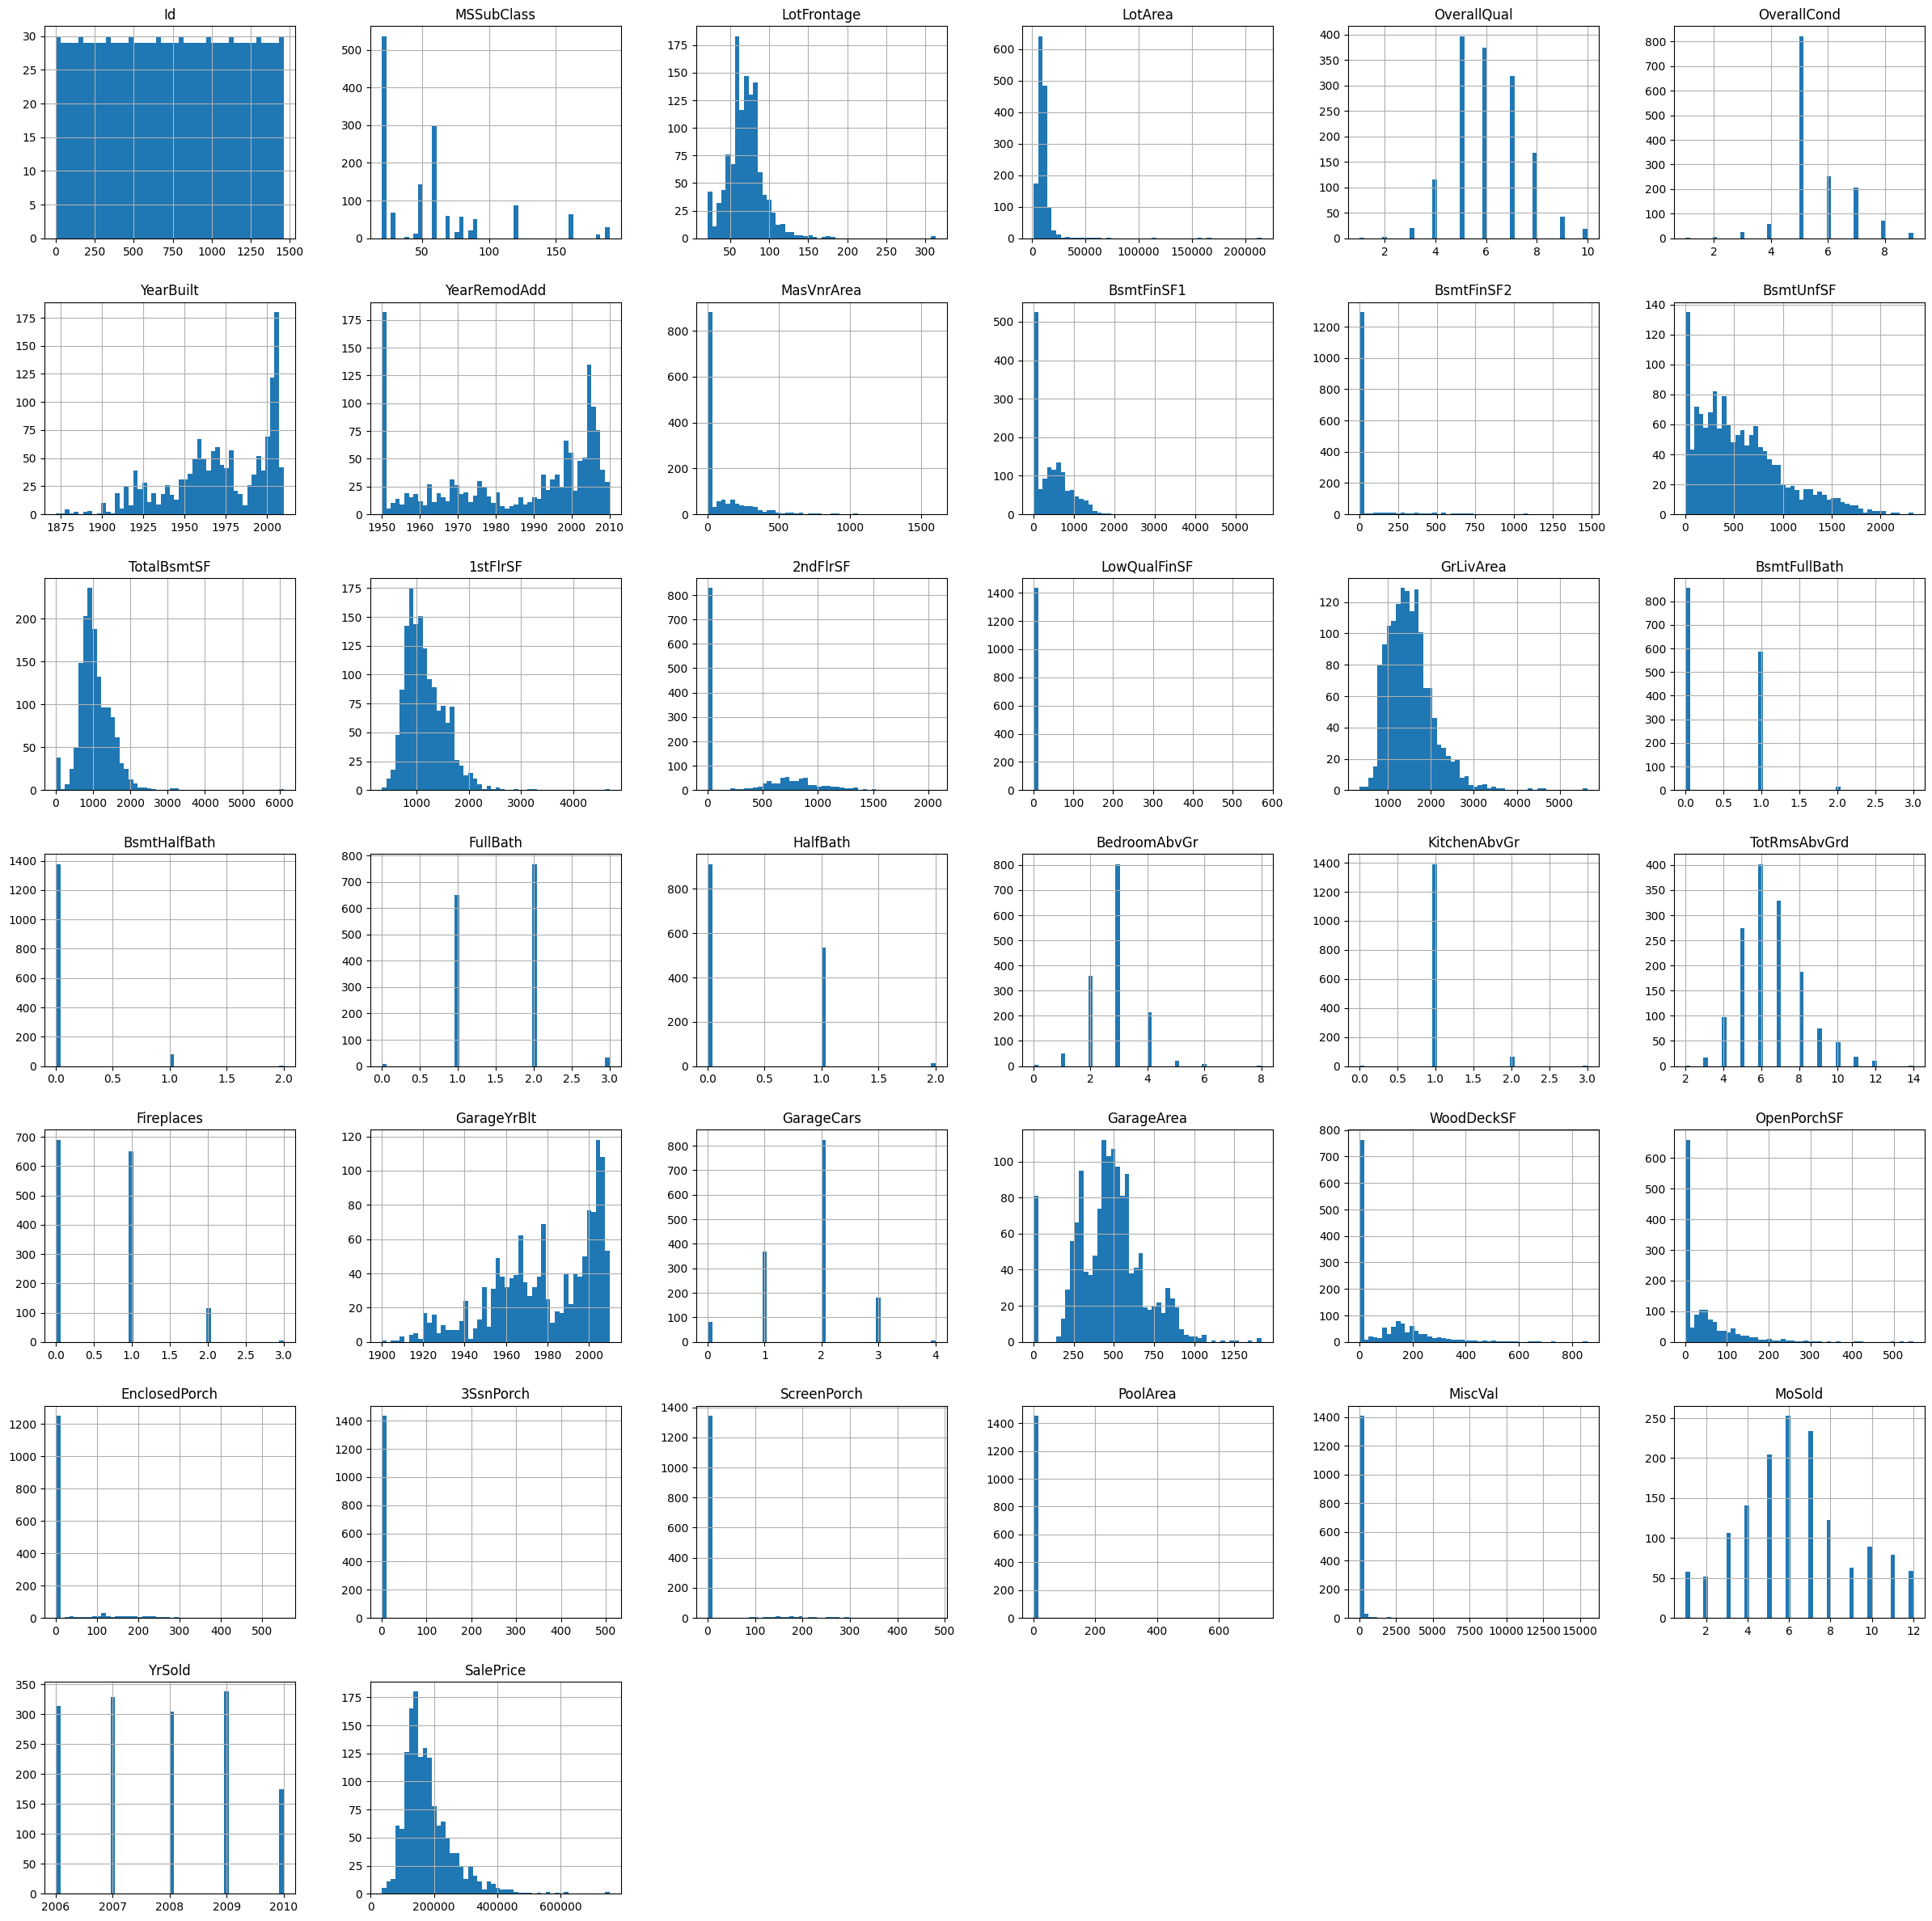

In [7]:
datos_entrenamiento.hist(bins=50, figsize=(30,30))
plt.show()

Como era de esperarse, la columna que falta en los datos de prueba corresponde a la columna del precio de venta o **SalePrice**

Ahora vamos a ver la descripción que tenemos adjunta para cada una de las columnas, que se encuentra en el archivo *.txt*

In [8]:
archivo = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt")
print(archivo.readlines())

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n', '\n', '        20\t1-STORY 1946 & NEWER ALL STYLES\n', '        30\t1-STORY 1945 & OLDER\n', '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n', '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n', '        50\t1-1/2 STORY FINISHED ALL AGES\n', '        60\t2-STORY 1946 & NEWER\n', '        70\t2-STORY 1945 & OLDER\n', '        75\t2-1/2 STORY ALL AGES\n', '        80\tSPLIT OR MULTI-LEVEL\n', '        85\tSPLIT FOYER\n', '        90\tDUPLEX - ALL STYLES AND AGES\n', '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n', '       150\t1-1/2 STORY PUD - ALL AGES\n', '       160\t2-STORY PUD - 1946 & NEWER\n', '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n', '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n', '\n', 'MSZoning: Identifies the general zoning classification of the sale.\n', '\t\t\n', '       A\tAgriculture\n', '       C\tCommercial\n', '       FV\tFloating Village Residential

In [9]:
print('MSSubClass: Identifies the type of dwelling involved in the sale.\t\n', '\n', '        20\t1-STORY 1946 & NEWER ALL STYLES\n', '        30\t1-STORY 1945 & OLDER\n', '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n', '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n', '        50\t1-1/2 STORY FINISHED ALL AGES\n', '        60\t2-STORY 1946 & NEWER\n', '        70\t2-STORY 1945 & OLDER\n', '        75\t2-1/2 STORY ALL AGES\n', '        80\tSPLIT OR MULTI-LEVEL\n', '        85\tSPLIT FOYER\n', '        90\tDUPLEX - ALL STYLES AND AGES\n', '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n', '       150\t1-1/2 STORY PUD - ALL AGES\n', '       160\t2-STORY PUD - 1946 & NEWER\n', '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n', '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n', '\n', 'MSZoning: Identifies the general zoning classification of the sale.\n', '\t\t\n', '       A\tAgriculture\n', '       C\tCommercial\n', '       FV\tFloating Village Residential\n', '       I\tIndustrial\n', '       RH\tResidential High Density\n', '       RL\tResidential Low Density\n', '       RP\tResidential Low Density Park \n', '       RM\tResidential Medium Density\n', '\t\n', 'LotFrontage: Linear feet of street connected to property\n', '\n', 'LotArea: Lot size in square feet\n', '\n', 'Street: Type of road access to property\n', '\n', '       Grvl\tGravel\t\n', '       Pave\tPaved\n', '       \t\n', 'Alley: Type of alley access to property\n', '\n', '       Grvl\tGravel\n', '       Pave\tPaved\n', '       NA \tNo alley access\n', '\t\t\n', 'LotShape: General shape of property\n', '\n', '       Reg\tRegular\t\n', '       IR1\tSlightly irregular\n', '       IR2\tModerately Irregular\n', '       IR3\tIrregular\n', '       \n', 'LandContour: Flatness of the property\n', '\n', '       Lvl\tNear Flat/Level\t\n', '       Bnk\tBanked - Quick and significant rise from street grade to building\n', '       HLS\tHillside - Significant slope from side to side\n', '       Low\tDepression\n', '\t\t\n', 'Utilities: Type of utilities available\n', '\t\t\n', '       AllPub\tAll public Utilities (E,G,W,& S)\t\n', '       NoSewr\tElectricity, Gas, and Water (Septic Tank)\n', '       NoSeWa\tElectricity and Gas Only\n', '       ELO\tElectricity only\t\n', '\t\n', 'LotConfig: Lot configuration\n', '\n', '       Inside\tInside lot\n', '       Corner\tCorner lot\n', '       CulDSac\tCul-de-sac\n', '       FR2\tFrontage on 2 sides of property\n', '       FR3\tFrontage on 3 sides of property\n', '\t\n', 'LandSlope: Slope of property\n', '\t\t\n', '       Gtl\tGentle slope\n', '       Mod\tModerate Slope\t\n', '       Sev\tSevere Slope\n', '\t\n', 'Neighborhood: Physical locations within Ames city limits\n', '\n', '       Blmngtn\tBloomington Heights\n', '       Blueste\tBluestem\n', '       BrDale\tBriardale\n', '       BrkSide\tBrookside\n', '       ClearCr\tClear Creek\n', '       CollgCr\tCollege Creek\n', '       Crawfor\tCrawford\n', '       Edwards\tEdwards\n', '       Gilbert\tGilbert\n', '       IDOTRR\tIowa DOT and Rail Road\n', '       MeadowV\tMeadow Village\n', '       Mitchel\tMitchell\n', '       Names\tNorth Ames\n', '       NoRidge\tNorthridge\n', '       NPkVill\tNorthpark Villa\n', '       NridgHt\tNorthridge Heights\n', '       NWAmes\tNorthwest Ames\n', '       OldTown\tOld Town\n', '       SWISU\tSouth & West of Iowa State University\n', '       Sawyer\tSawyer\n', '       SawyerW\tSawyer West\n', '       Somerst\tSomerset\n', '       StoneBr\tStone Brook\n', '       Timber\tTimberland\n', '       Veenker\tVeenker\n', '\t\t\t\n', 'Condition1: Proximity to various conditions\n', '\t\n', '       Artery\tAdjacent to arterial street\n', '       Feedr\tAdjacent to feeder street\t\n', '       Norm\tNormal\t\n', "       RRNn\tWithin 200' of North-South Railroad\n", '       RRAn\tAdjacent to North-South Railroad\n', '       PosN\tNear positive off-site feature--park, greenbelt, etc.\n', '       PosA\tAdjacent to postive off-site feature\n', "       RRNe\tWithin 200' of East-West Railroad\n", '       RRAe\tAdjacent to East-West Railroad\n', '\t\n', 'Condition2: Proximity to various conditions (if more than one is present)\n', '\t\t\n', '       Artery\tAdjacent to arterial street\n', '       Feedr\tAdjacent to feeder street\t\n', '       Norm\tNormal\t\n', "       RRNn\tWithin 200' of North-South Railroad\n", '       RRAn\tAdjacent to North-South Railroad\n', '       PosN\tNear positive off-site feature--park, greenbelt, etc.\n', '       PosA\tAdjacent to postive off-site feature\n', "       RRNe\tWithin 200' of East-West Railroad\n", '       RRAe\tAdjacent to East-West Railroad\n', '\t\n', 'BldgType: Type of dwelling\n', '\t\t\n', '       1Fam\tSingle-family Detached\t\n', '       2FmCon\tTwo-family Conversion; originally built as one-family dwelling\n', '       Duplx\tDuplex\n', '       TwnhsE\tTownhouse End Unit\n', '       TwnhsI\tTownhouse Inside Unit\n', '\t\n', 'HouseStyle: Style of dwelling\n', '\t\n', '       1Story\tOne story\n', '       1.5Fin\tOne and one-half story: 2nd level finished\n', '       1.5Unf\tOne and one-half story: 2nd level unfinished\n', '       2Story\tTwo story\n', '       2.5Fin\tTwo and one-half story: 2nd level finished\n', '       2.5Unf\tTwo and one-half story: 2nd level unfinished\n', '       SFoyer\tSplit Foyer\n', '       SLvl\tSplit Level\n', '\t\n', 'OverallQual: Rates the overall material and finish of the house\n', '\n', '       10\tVery Excellent\n', '       9\tExcellent\n', '       8\tVery Good\n', '       7\tGood\n', '       6\tAbove Average\n', '       5\tAverage\n', '       4\tBelow Average\n', '       3\tFair\n', '       2\tPoor\n', '       1\tVery Poor\n', '\t\n', 'OverallCond: Rates the overall condition of the house\n', '\n', '       10\tVery Excellent\n', '       9\tExcellent\n', '       8\tVery Good\n', '       7\tGood\n', '       6\tAbove Average\t\n', '       5\tAverage\n', '       4\tBelow Average\t\n', '       3\tFair\n', '       2\tPoor\n', '       1\tVery Poor\n', '\t\t\n', 'YearBuilt: Original construction date\n', '\n', 'YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)\n', '\n', 'RoofStyle: Type of roof\n', '\n', '       Flat\tFlat\n', '       Gable\tGable\n', '       Gambrel\tGabrel (Barn)\n', '       Hip\tHip\n', '       Mansard\tMansard\n', '       Shed\tShed\n', '\t\t\n', 'RoofMatl: Roof material\n', '\n', '       ClyTile\tClay or Tile\n', '       CompShg\tStandard (Composite) Shingle\n', '       Membran\tMembrane\n', '       Metal\tMetal\n', '       Roll\tRoll\n', '       Tar&Grv\tGravel & Tar\n', '       WdShake\tWood Shakes\n', '       WdShngl\tWood Shingles\n', '\t\t\n', 'Exterior1st: Exterior covering on house\n', '\n', '       AsbShng\tAsbestos Shingles\n', '       AsphShn\tAsphalt Shingles\n', '       BrkComm\tBrick Common\n', '       BrkFace\tBrick Face\n', '       CBlock\tCinder Block\n', '       CemntBd\tCement Board\n', '       HdBoard\tHard Board\n', '       ImStucc\tImitation Stucco\n', '       MetalSd\tMetal Siding\n', '       Other\tOther\n', '       Plywood\tPlywood\n', '       PreCast\tPreCast\t\n', '       Stone\tStone\n', '       Stucco\tStucco\n', '       VinylSd\tVinyl Siding\n', '       Wd Sdng\tWood Siding\n', '       WdShing\tWood Shingles\n', '\t\n', 'Exterior2nd: Exterior covering on house (if more than one material)\n', '\n', '       AsbShng\tAsbestos Shingles\n', '       AsphShn\tAsphalt Shingles\n', '       BrkComm\tBrick Common\n', '       BrkFace\tBrick Face\n', '       CBlock\tCinder Block\n', '       CemntBd\tCement Board\n', '       HdBoard\tHard Board\n', '       ImStucc\tImitation Stucco\n', '       MetalSd\tMetal Siding\n', '       Other\tOther\n', '       Plywood\tPlywood\n', '       PreCast\tPreCast\n', '       Stone\tStone\n', '       Stucco\tStucco\n', '       VinylSd\tVinyl Siding\n', '       Wd Sdng\tWood Siding\n', '       WdShing\tWood Shingles\n', '\t\n', 'MasVnrType: Masonry veneer type\n', '\n', '       BrkCmn\tBrick Common\n', '       BrkFace\tBrick Face\n', '       CBlock\tCinder Block\n', '       None\tNone\n', '       Stone\tStone\n', '\t\n', 'MasVnrArea: Masonry veneer area in square feet\n', '\n', 'ExterQual: Evaluates the quality of the material on the exterior \n', '\t\t\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tAverage/Typical\n', '       Fa\tFair\n', '       Po\tPoor\n', '\t\t\n', 'ExterCond: Evaluates the present condition of the material on the exterior\n', '\t\t\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tAverage/Typical\n', '       Fa\tFair\n', '       Po\tPoor\n', '\t\t\n', 'Foundation: Type of foundation\n', '\t\t\n', '       BrkTil\tBrick & Tile\n', '       CBlock\tCinder Block\n', '       PConc\tPoured Contrete\t\n', '       Slab\tSlab\n', '       Stone\tStone\n', '       Wood\tWood\n', '\t\t\n', 'BsmtQual: Evaluates the height of the basement\n', '\n', '       Ex\tExcellent (100+ inches)\t\n', '       Gd\tGood (90-99 inches)\n', '       TA\tTypical (80-89 inches)\n', '       Fa\tFair (70-79 inches)\n', '       Po\tPoor (<70 inches\n', '       NA\tNo Basement\n', '\t\t\n', 'BsmtCond: Evaluates the general condition of the basement\n', '\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tTypical - slight dampness allowed\n', '       Fa\tFair - dampness or some cracking or settling\n', '       Po\tPoor - Severe cracking, settling, or wetness\n', '       NA\tNo Basement\n', '\t\n', 'BsmtExposure: Refers to walkout or garden level walls\n', '\n', '       Gd\tGood Exposure\n', '       Av\tAverage Exposure (split levels or foyers typically score average or above)\t\n', '       Mn\tMimimum Exposure\n', '       No\tNo Exposure\n', '       NA\tNo Basement\n', '\t\n', 'BsmtFinType1: Rating of basement finished area\n', '\n', '       GLQ\tGood Living Quarters\n', '       ALQ\tAverage Living Quarters\n', '       BLQ\tBelow Average Living Quarters\t\n', '       Rec\tAverage Rec Room\n', '       LwQ\tLow Quality\n', '       Unf\tUnfinshed\n', '       NA\tNo Basement\n', '\t\t\n', 'BsmtFinSF1: Type 1 finished square feet\n', '\n', 'BsmtFinType2: Rating of basement finished area (if multiple types)\n', '\n', '       GLQ\tGood Living Quarters\n', '       ALQ\tAverage Living Quarters\n', '       BLQ\tBelow Average Living Quarters\t\n', '       Rec\tAverage Rec Room\n', '       LwQ\tLow Quality\n', '       Unf\tUnfinshed\n', '       NA\tNo Basement\n', '\n', 'BsmtFinSF2: Type 2 finished square feet\n', '\n', 'BsmtUnfSF: Unfinished square feet of basement area\n', '\n', 'TotalBsmtSF: Total square feet of basement area\n', '\n', 'Heating: Type of heating\n', '\t\t\n', '       Floor\tFloor Furnace\n', '       GasA\tGas forced warm air furnace\n', '       GasW\tGas hot water or steam heat\n', '       Grav\tGravity furnace\t\n', '       OthW\tHot water or steam heat other than gas\n', '       Wall\tWall furnace\n', '\t\t\n', 'HeatingQC: Heating quality and condition\n', '\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tAverage/Typical\n', '       Fa\tFair\n', '       Po\tPoor\n', '\t\t\n', 'CentralAir: Central air conditioning\n', '\n', '       N\tNo\n', '       Y\tYes\n', '\t\t\n', 'Electrical: Electrical system\n', '\n', '       SBrkr\tStandard Circuit Breakers & Romex\n', '       FuseA\tFuse Box over 60 AMP and all Romex wiring (Average)\t\n', '       FuseF\t60 AMP Fuse Box and mostly Romex wiring (Fair)\n', '       FuseP\t60 AMP Fuse Box and mostly knob & tube wiring (poor)\n', '       Mix\tMixed\n', '\t\t\n', '1stFlrSF: First Floor square feet\n', ' \n', '2ndFlrSF: Second floor square feet\n', '\n', 'LowQualFinSF: Low quality finished square feet (all floors)\n', '\n', 'GrLivArea: Above grade (ground) living area square feet\n', '\n', 'BsmtFullBath: Basement full bathrooms\n', '\n', 'BsmtHalfBath: Basement half bathrooms\n', '\n', 'FullBath: Full bathrooms above grade\n', '\n', 'HalfBath: Half baths above grade\n', '\n', 'Bedroom: Bedrooms above grade (does NOT include basement bedrooms)\n', '\n', 'Kitchen: Kitchens above grade\n', '\n', 'KitchenQual: Kitchen quality\n', '\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tTypical/Average\n', '       Fa\tFair\n', '       Po\tPoor\n', '       \t\n', 'TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)\n', '\n', 'Functional: Home functionality (Assume typical unless deductions are warranted)\n', '\n', '       Typ\tTypical Functionality\n', '       Min1\tMinor Deductions 1\n', '       Min2\tMinor Deductions 2\n', '       Mod\tModerate Deductions\n', '       Maj1\tMajor Deductions 1\n', '       Maj2\tMajor Deductions 2\n', '       Sev\tSeverely Damaged\n', '       Sal\tSalvage only\n', '\t\t\n', 'Fireplaces: Number of fireplaces\n', '\n', 'FireplaceQu: Fireplace quality\n', '\n', '       Ex\tExcellent - Exceptional Masonry Fireplace\n', '       Gd\tGood - Masonry Fireplace in main level\n', '       TA\tAverage - Prefabricated Fireplace in main living area or Masonry Fireplace in basement\n', '       Fa\tFair - Prefabricated Fireplace in basement\n', '       Po\tPoor - Ben Franklin Stove\n', '       NA\tNo Fireplace\n', '\t\t\n', 'GarageType: Garage location\n', '\t\t\n', '       2Types\tMore than one type of garage\n', '       Attchd\tAttached to home\n', '       Basment\tBasement Garage\n', '       BuiltIn\tBuilt-In (Garage part of house - typically has room above garage)\n', '       CarPort\tCar Port\n', '       Detchd\tDetached from home\n', '       NA\tNo Garage\n', '\t\t\n', 'GarageYrBlt: Year garage was built\n', '\t\t\n', 'GarageFinish: Interior finish of the garage\n', '\n', '       Fin\tFinished\n', '       RFn\tRough Finished\t\n', '       Unf\tUnfinished\n', '       NA\tNo Garage\n', '\t\t\n', 'GarageCars: Size of garage in car capacity\n', '\n', 'GarageArea: Size of garage in square feet\n', '\n', 'GarageQual: Garage quality\n', '\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tTypical/Average\n', '       Fa\tFair\n', '       Po\tPoor\n', '       NA\tNo Garage\n', '\t\t\n', 'GarageCond: Garage condition\n', '\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tTypical/Average\n', '       Fa\tFair\n', '       Po\tPoor\n', '       NA\tNo Garage\n', '\t\t\n', 'PavedDrive: Paved driveway\n', '\n', '       Y\tPaved \n', '       P\tPartial Pavement\n', '       N\tDirt/Gravel\n', '\t\t\n', 'WoodDeckSF: Wood deck area in square feet\n', '\n', 'OpenPorchSF: Open porch area in square feet\n', '\n', 'EnclosedPorch: Enclosed porch area in square feet\n', '\n', '3SsnPorch: Three season porch area in square feet\n', '\n', 'ScreenPorch: Screen porch area in square feet\n', '\n', 'PoolArea: Pool area in square feet\n', '\n', 'PoolQC: Pool quality\n', '\t\t\n', '       Ex\tExcellent\n', '       Gd\tGood\n', '       TA\tAverage/Typical\n', '       Fa\tFair\n', '       NA\tNo Pool\n', '\t\t\n', 'Fence: Fence quality\n', '\t\t\n', '       GdPrv\tGood Privacy\n', '       MnPrv\tMinimum Privacy\n', '       GdWo\tGood Wood\n', '       MnWw\tMinimum Wood/Wire\n', '       NA\tNo Fence\n', '\t\n', 'MiscFeature: Miscellaneous feature not covered in other categories\n', '\t\t\n', '       Elev\tElevator\n', '       Gar2\t2nd Garage (if not described in garage section)\n', '       Othr\tOther\n', '       Shed\tShed (over 100 SF)\n', '       TenC\tTennis Court\n', '       NA\tNone\n', '\t\t\n', 'MiscVal: $Value of miscellaneous feature\n', '\n', 'MoSold: Month Sold (MM)\n', '\n', 'YrSold: Year Sold (YYYY)\n', '\n', 'SaleType: Type of sale\n', '\t\t\n', '       WD \tWarranty Deed - Conventional\n', '       CWD\tWarranty Deed - Cash\n', '       VWD\tWarranty Deed - VA Loan\n', '       New\tHome just constructed and sold\n', '       COD\tCourt Officer Deed/Estate\n', '       Con\tContract 15% Down payment regular terms\n', '       ConLw\tContract Low Down payment and low interest\n', '       ConLI\tContract Low Interest\n', '       ConLD\tContract Low Down\n', '       Oth\tOther\n', '\t\t\n', 'SaleCondition: Condition of sale\n', '\n', '       Normal\tNormal Sale\n', '       Abnorml\tAbnormal Sale -  trade, foreclosure, short sale\n', '       AdjLand\tAdjoining Land Purchase\n', '       Alloca\tAllocation - two linked properties with separate deeds, typically condo with a garage unit\t\n', '       Family\tSale between family members\n', '       Partial\tHome was not completed when last assessed (associated with New Homes)\n')

MSSubClass: Identifies the type of dwelling involved in the sale.	
 
         20	1-STORY 1946 & NEWER ALL STYLES
         30	1-STORY 1945 & OLDER
         40	1-STORY W/FINISHED ATTIC ALL AGES
         45	1-1/2 STORY - UNFINISHED ALL AGES
         50	1-1/2 STORY FINISHED ALL AGES
         60	2-STORY 1946 & NEWER
         70	2-STORY 1945 & OLDER
         75	2-1/2 STORY ALL AGES
         80	SPLIT OR MULTI-LEVEL
         85	SPLIT FOYER
         90	DUPLEX - ALL STYLES AND AGES
        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
        150	1-1/2 STORY PUD - ALL AGES
        160	2-STORY PUD - 1946 & NEWER
        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
        190	2 FAMILY CONVERSION - ALL STYLES AND AGES
 
 MSZoning: Identifies the general zoning classification of the sale.
 		
        A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential 

Debido a la descripción de las propiedades, lo mas posible es que se necesite especificar un conjunto de caracteristicas relevantes para determinar el valor de las casas, dado que sólo una caracteristica no va a determinar de forma global todas las posibles opciones para poder encontrar el valor adecuado a la misma, además aquellos valores categoricos tendremos que cambiarlos a números, además que debemos poder eliminar aquellas columnas que no van a aportar un valor relevante, como es el ID de cada una, y alguna otra caracteristica que no tenga especial relevancia

Ahora vamos a obtener cada una de las propiedades con describe y value_counts de cada una de las diferentes columnas a través de un bucle for, ya que el método describe() no me permite visualizar la información de todas las columas:

In [10]:
datos_entrenamiento.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
descripciones_entrenamiento = {}
for columna in datos_entrenamiento.columns:
    descripciones_entrenamiento[columna] = datos_entrenamiento[columna].describe()
print(descripciones_entrenamiento)

{'Id': count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64, 'MSSubClass': count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64, 'MSZoning': count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object, 'LotFrontage': count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64, 'LotArea': count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64, 'Street': count     1460
unique     

In [12]:
conteo_valores_entrenamiento = {}
for columna in datos_entrenamiento.columns:
    conteo_valores_entrenamiento[columna] = datos_entrenamiento[columna].value_counts()
print(conteo_valores_entrenamiento)

{'Id': Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64, 'MSSubClass': MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64, 'MSZoning': MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64, 'LotFrontage': LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64, 'LotArea': LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64, 'Street': Street
Pave    1454
Grvl       6
Name: count, dtype: int64, 'Alley': Alley
Grvl   

Debido a que tenemos gran cantidad de datos, tenemos que poder agrupar los datos en función de su tipo, y dividirlo en diferentes dataframes para poder ver cuáles pueden ser aquellos que puedan aportar mejores datos a la predicción de los precios de las respectivas casas

Primero vamos a contar aquellos datos faltantes, para posteriormente poder eliminar aquellas columnas que presenten falta de información:

In [13]:
# Contar los valores faltantes por columna
missing_values_count = datos_entrenamiento.isnull().sum(axis=0)

# Mostrar las columnas con valores faltantes
for columna, cantidad in missing_values_count.items():
    if cantidad > 0:
        tipo_dato = datos_entrenamiento[columna].dtype
        print(f"Columna: {columna}")
        print(f"  - Tipo de dato: {tipo_dato}")
        print(f"  - Cantidad de valores faltantes: {cantidad}")

Columna: LotFrontage
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 259
Columna: Alley
  - Tipo de dato: object
  - Cantidad de valores faltantes: 1369
Columna: MasVnrType
  - Tipo de dato: object
  - Cantidad de valores faltantes: 872
Columna: MasVnrArea
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 8
Columna: BsmtQual
  - Tipo de dato: object
  - Cantidad de valores faltantes: 37
Columna: BsmtCond
  - Tipo de dato: object
  - Cantidad de valores faltantes: 37
Columna: BsmtExposure
  - Tipo de dato: object
  - Cantidad de valores faltantes: 38
Columna: BsmtFinType1
  - Tipo de dato: object
  - Cantidad de valores faltantes: 37
Columna: BsmtFinType2
  - Tipo de dato: object
  - Cantidad de valores faltantes: 38
Columna: Electrical
  - Tipo de dato: object
  - Cantidad de valores faltantes: 1
Columna: FireplaceQu
  - Tipo de dato: object
  - Cantidad de valores faltantes: 690
Columna: GarageType
  - Tipo de dato: object
  - Cantidad de valores faltantes: 81


Vamos a eliminar esos datos faltantes, ya que pueden ser importantes, pero por falta de información las vamos a eliminar:

# Columnas que no tienen suficiente información

In [14]:
Columnas_a_eliminar = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
datos_entrenamiento = datos_entrenamiento.drop(Columnas_a_eliminar, axis=1)
datos_entrenamiento

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Ahora eliminamos aquella primera columna, ya que no aporta ninguna información importante

# Columnas que no aportan valor a los datos

In [15]:
Columnas_sin_informacion = ['Id']
datos_entrenamiento = datos_entrenamiento.drop(Columnas_sin_informacion, axis=1)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Ahora vamos a clasificar los datos faltantes, para así saber cuál procedimiento seguir para poder dar los respectivos valores que falten:

# Clasificación de los datos, por aquellos que les faltan una parte de los datos

In [16]:
# Contar los valores faltantes por columna
missing_values_count = datos_entrenamiento.isnull().sum(axis=0)

# Mostrar las columnas con valores faltantes
for columna, cantidad in missing_values_count.items():
    if cantidad > 0:
        tipo_dato = datos_entrenamiento[columna].dtype
        print(f"Columna: {columna}")
        print(f"  - Tipo de dato: {tipo_dato}")
        print(f"  - Cantidad de valores faltantes: {cantidad}")

Columna: LotFrontage
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 259
Columna: MasVnrArea
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 8
Columna: BsmtQual
  - Tipo de dato: object
  - Cantidad de valores faltantes: 37
Columna: BsmtCond
  - Tipo de dato: object
  - Cantidad de valores faltantes: 37
Columna: BsmtExposure
  - Tipo de dato: object
  - Cantidad de valores faltantes: 38
Columna: BsmtFinType1
  - Tipo de dato: object
  - Cantidad de valores faltantes: 37
Columna: BsmtFinType2
  - Tipo de dato: object
  - Cantidad de valores faltantes: 38
Columna: Electrical
  - Tipo de dato: object
  - Cantidad de valores faltantes: 1
Columna: GarageType
  - Tipo de dato: object
  - Cantidad de valores faltantes: 81
Columna: GarageYrBlt
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 81
Columna: GarageFinish
  - Tipo de dato: object
  - Cantidad de valores faltantes: 81
Columna: GarageQual
  - Tipo de dato: object
  - Cantidad de valores faltantes:

# Cambio por variables categóricas a las columnas correspondientes

Ahora voy a cambiar los valores correspondientes a aquellas columnas categoricas, por valores númericos, para despúes poder comparar los distintos valores, y obtener aquellos que sean de mayor relevancia para poder realizar la respectiva predicción

In [17]:
datos_entrenamiento['MSZoning'].replace(['RL','RM','FV','RH','C (all)'],[0,1,2,3,4], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
datos_entrenamiento['Street'].replace(['Pave','Grvl'],[0,1], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,0,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,0,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,0,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,0,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
datos_entrenamiento['LotShape'].replace(['Reg','IR1','IR2','IR3'],[0,1,2,3], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,0,0,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,0,1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,0,1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,0,1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,0,0,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,0,0,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,0,0,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [20]:
datos_entrenamiento['LandContour'].replace(['Lvl','Bnk','HLS','Low'],[0,1,2,3], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,0,0,0,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,0,1,0,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,0,1,0,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,0,1,0,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,0,0,0,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,0,0,0,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,0,0,0,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [21]:
datos_entrenamiento['Utilities'].replace(['AllPub','NoSeWa'],[0,1], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,0,0,0,0,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,0,1,0,0,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,0,1,0,0,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,0,1,0,0,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,0,0,0,0,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,0,0,0,0,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,0,0,0,0,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [22]:
datos_entrenamiento['LotConfig'].replace(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],[0,1,2,3,4], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,0,0,0,0,3,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,0,1,0,0,0,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,0,1,0,0,1,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,0,1,0,0,3,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,0,0,0,0,0,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,0,0,0,0,0,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,0,0,0,0,0,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [23]:
datos_entrenamiento['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [0,1,2], inplace= True)
datos_entrenamiento['Neighborhood'].replace(['NAmes','CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], inplace= True)
datos_entrenamiento['Condition1'].replace(['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], [0,1,2,3,4,5,6,7,8], inplace=True)
datos_entrenamiento['Condition2'].replace(['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn'],[0,1,2,3,4,5,6,7], inplace=True)
datos_entrenamiento['BldgType'].replace(['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'],[0,1,2,3,4], inplace=True)
datos_entrenamiento['HouseStyle'].replace(['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'],[0,1,2,3,4,5,6,7], inplace=True)
datos_entrenamiento['RoofStyle'].replace(['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['RoofStyle'].replace(['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['RoofMatl'].replace(['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran','Roll','ClyTile'],[0,1,2,3,4,5,6,7], inplace=True)
datos_entrenamiento['Exterior1st'].replace(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd','BrkFace','WdShing', 'Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc','CBlock'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)


In [24]:
datos_entrenamiento['Exterior1st'].replace(['VinylSd','MetalSd','HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd', 'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 'Stone', 'AsphsShn', 'Other', 'CBlock'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)
datos_entrenamiento['ExterQual'].replace(['TA','Gd','Ex','Fa'],[0,1,2,3], inplace=True)
datos_entrenamiento['ExterCond'].replace(['TA','Gd','Fa','Ex', 'Po'],[0,1,2,3,4], inplace=True)
datos_entrenamiento

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,0,80.0,9600,0,0,0,0,3,0,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,0,60.0,9550,0,1,0,0,1,0,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,0,84.0,14260,0,1,0,0,3,0,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [25]:
datos_entrenamiento['Foundation'].replace(['PConc','CBlock','Brktil','Slab', 'Stone', 'Wood'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['BsmtQual'].replace(['TA','Gd','Ex','Fa'],[0,1,2,3], inplace=True)
datos_entrenamiento['BsmtCond'].replace(['TA','Gd','Fa','Po'],[0,1,2,3], inplace=True)
datos_entrenamiento['BsmtExposure'].replace(['No','Av','Gd','Mn'],[0,1,2,3], inplace=True)
datos_entrenamiento['BsmtFinType1'].replace(['Unf','GLQ','ALQ','BLQ','Rec','LwQ'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['BsmtFinType2'].replace(['Unf','Rec','LwQ','BLQ','ALQ','GLQ'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['Heating'].replace(['GasA','GasW','Grav','Wall','OthW','Floor'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['HeatingQC'].replace(['Ex','TA','Gd','Fa','Po'],[0,1,2,3,4], inplace=True)
datos_entrenamiento['CentralAir'].replace(['Y','N'],[0,1], inplace=True)
datos_entrenamiento['Electrical'].replace(['SBrkr','FuseA','FuseF','FuseP','Mix'],[0,1,2,3,4], inplace=True)
datos_entrenamiento['KitchenQual'].replace(['TA','Gd','Ex','Fa'],[0,1,2,3], inplace=True)
datos_entrenamiento['Functional'].replace(['Typ','Min2','Min1','Mod','Maj1','Maj2', 'Sev'],[0,1,2,3,4,5,6], inplace=True)
datos_entrenamiento['GarageType'].replace(['Attchd','Detchd','BuiltIn','Basment','CarPort','2Types'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['GarageFinish'].replace(['Unf','RFn','Fin'],[0,1,2], inplace=True)
datos_entrenamiento['GarageQual'].replace(['TA','Fa','Gd','Ex','Po'],[0,1,2,3,4], inplace=True)
datos_entrenamiento['GarageCond'].replace(['TA','Fa','Gd','Po','Ex'],[0,1,2,3,4], inplace=True)
datos_entrenamiento['PavedDrive'].replace(['Y','N','P'],[0,1,2], inplace=True)
datos_entrenamiento['SaleType'].replace(['WD','New','COD','ConLD','ConLI', 'CWD', 'Othr', 'Con'],[0,1,2,3,4,5,6,7], inplace=True)
datos_entrenamiento['SaleCondition'].replace(['Normal','Partial','Abnorml','Family', 'Alloca', 'AdjLand'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento['SaleCondition'].replace(['Normal','Partial','Abnorml','Family', 'Alloca', 'AdjLand'],[0,1,2,3,4,5], inplace=True)
datos_entrenamiento



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,3,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,1,0,0,1,0,...,272,0,0,0,0,2,2006,0,2,140000
4,60,0,84.0,14260,0,1,0,0,3,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125


# Llenar los espacios en blanco de las respectivas columnas

Ya que se cambiaron a números aquellos datos categoricos, ahora vamos a proceder de la siguiente forma:
* Aquellos datos númericos faltantes serán el resultado de el promedio de todos los demás valores
* Aquellos datos categóricos faltantes se escogeran al azar y se asignarán a cada espacio sin ese dato

In [26]:
LotFrontage = datos_entrenamiento['LotFrontage'].mean()
datos_entrenamiento['LotFrontage'].fillna(LotFrontage, inplace = True)
print(datos_entrenamiento['LotFrontage'].isnull().sum())

0


In [27]:
MasVnrArea = datos_entrenamiento['MasVnrArea'].mean()
datos_entrenamiento['MasVnrArea'].fillna(MasVnrArea, inplace = True)
print(datos_entrenamiento['MasVnrArea'].isnull().sum())

0


In [28]:
BsmtQual = np.random.randint(0, 3)
datos_entrenamiento['BsmtQual'].fillna(BsmtQual, inplace = True)
print(datos_entrenamiento['BsmtQual'].isnull().sum())

0


In [29]:
BsmtCond = np.random.randint(0, 3)
datos_entrenamiento['BsmtCond'].fillna(BsmtCond, inplace = True)
print(datos_entrenamiento['BsmtCond'].isnull().sum())

0


In [30]:
BsmtExposure = np.random.randint(0, 3)
datos_entrenamiento['BsmtExposure'].fillna(BsmtExposure, inplace = True)
print(datos_entrenamiento['BsmtExposure'].isnull().sum())

0


In [31]:
BsmtFinType1 = np.random.randint(0, 5)
datos_entrenamiento['BsmtFinType1'].fillna(BsmtFinType1, inplace = True)
print(datos_entrenamiento['BsmtFinType1'].isnull().sum())

0


In [32]:
BsmtFinType2 = np.random.randint(0, 5)
datos_entrenamiento['BsmtFinType2'].fillna(BsmtFinType2, inplace = True)
print(datos_entrenamiento['BsmtFinType2'].isnull().sum())

0


In [33]:
Electrical = np.random.randint(0, 4)
datos_entrenamiento['Electrical'].fillna(Electrical, inplace = True)
print(datos_entrenamiento['Electrical'].isnull().sum())

0


In [34]:
GarageType = np.random.randint(0, 4)
datos_entrenamiento['GarageType'].fillna(GarageType, inplace = True)
print(datos_entrenamiento['GarageType'].isnull().sum())

0


In [35]:
GarageYrBlt = datos_entrenamiento['GarageYrBlt'].mean()
datos_entrenamiento['GarageYrBlt'].fillna(GarageYrBlt, inplace = True)
print(datos_entrenamiento['GarageYrBlt'].isnull().sum())

0


In [36]:
GarageFinish = np.random.randint(0, 2)
datos_entrenamiento['GarageFinish'].fillna(GarageFinish, inplace = True)
print(datos_entrenamiento['GarageFinish'].isnull().sum())

0


In [37]:
GarageQual = np.random.randint(0, 4)
datos_entrenamiento['GarageQual'].fillna(GarageQual, inplace = True)
print(datos_entrenamiento['GarageQual'].isnull().sum())

0


In [38]:

GarageCond = np.random.randint(0, 4)
datos_entrenamiento['GarageCond'].fillna(GarageCond, inplace = True)
print(datos_entrenamiento['GarageCond'].isnull().sum())

0


Comprobamos que tenemos todos los datos completos

In [39]:
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Debido a que tenemos otras columnas tipo Objeto, procedemos a eliminarlas, dado que por alguna razón al no convertirse a tipo int o float, no permiten trabajar los datos bien, y se espera que esto no afecte considerablemente la prediccion en el conjunto de datos

In [40]:
Otras_columnas_a_eliminar = ['Exterior2nd', 'Foundation', 'SaleType']
datos_entrenamiento = datos_entrenamiento.drop(Otras_columnas_a_eliminar, axis=1)
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Cálculo del coeficiente $R$ de Pearson

Vemos la correlación de acuerdo al coeficiente $R$ de Pearson, para ver que variables pueden ser mejores para realizar la predicción, y cuáles podriamos no tener en cuenta, luego ordenamos los valores de menor a mayor y visualizamos los resultados

In [41]:
correlaciones = pd.DataFrame(datos_entrenamiento.corr()['SalePrice'])
orden = correlaciones.sort_values(by="SalePrice")

In [42]:
orden.head(40)

,SalePrice
HeatingQC,-0.369935
CentralAir,-0.251328
Electrical,-0.233443
GarageCond,-0.230923
BsmtFinType1,-0.212668
PavedDrive,-0.208954
MSZoning,-0.183642
BldgType,-0.173900
Exterior1st,-0.165676
KitchenAbvGr,-0.135907


In [43]:
orden.tail(32)

,SalePrice
Neighborhood,0.130681
RoofStyle,0.156272
BedroomAbvGr,0.168213
BsmtUnfSF,0.214479
BsmtFullBath,0.227122
LotArea,0.263843
LotShape,0.267759
BsmtExposure,0.276043
HalfBath,0.284108
OpenPorchSF,0.315856


Vemos que hay algunos valores que tienen bastante correlación, por lo tanto lo que se procede ahora es realizar a través de varios modelos, estudiar cada uno de los posibles casos de acuerdo a su respectiva correlación, primero se estudiarán aquellos casos en los cuáles las columnas tengan una correlación mayor a 0.7 ($r>0.7$), luego aquellas columnas que tengan un $r>0.5$ (una correlación moderada) y finalmente una correlación débil $r>0.3$; es posible que se analizen aquellos datos con correlación negativa, y aquellos datos que tienen menor grado de importancia de acuerdo al coeficiente R de Pearson, o se utilice una forma diferente de obtener valores significativos

Primero vamos a ver si existe alguna posible correlación entre las dos columnas que tienen puntaje mayor a $0.7$:

In [44]:
corr = datos_entrenamiento.corr()
print(corr["OverallQual"]["GrLivArea"])

0.5930074300286512


El resultado al ser $0.59$, indica que la correlación es moderada, por lo tanto vamos a pasar a realizar las respectivas predicciones con el modelo de Machine Learning, primero vamos a empezar con la regresión lineal multiple:

# Distribución de los datos

Además podemos ver que columnas pueden aportar información de acuerdo a la distribución de los datos que aparece ahí, mediante diferentes histogramas

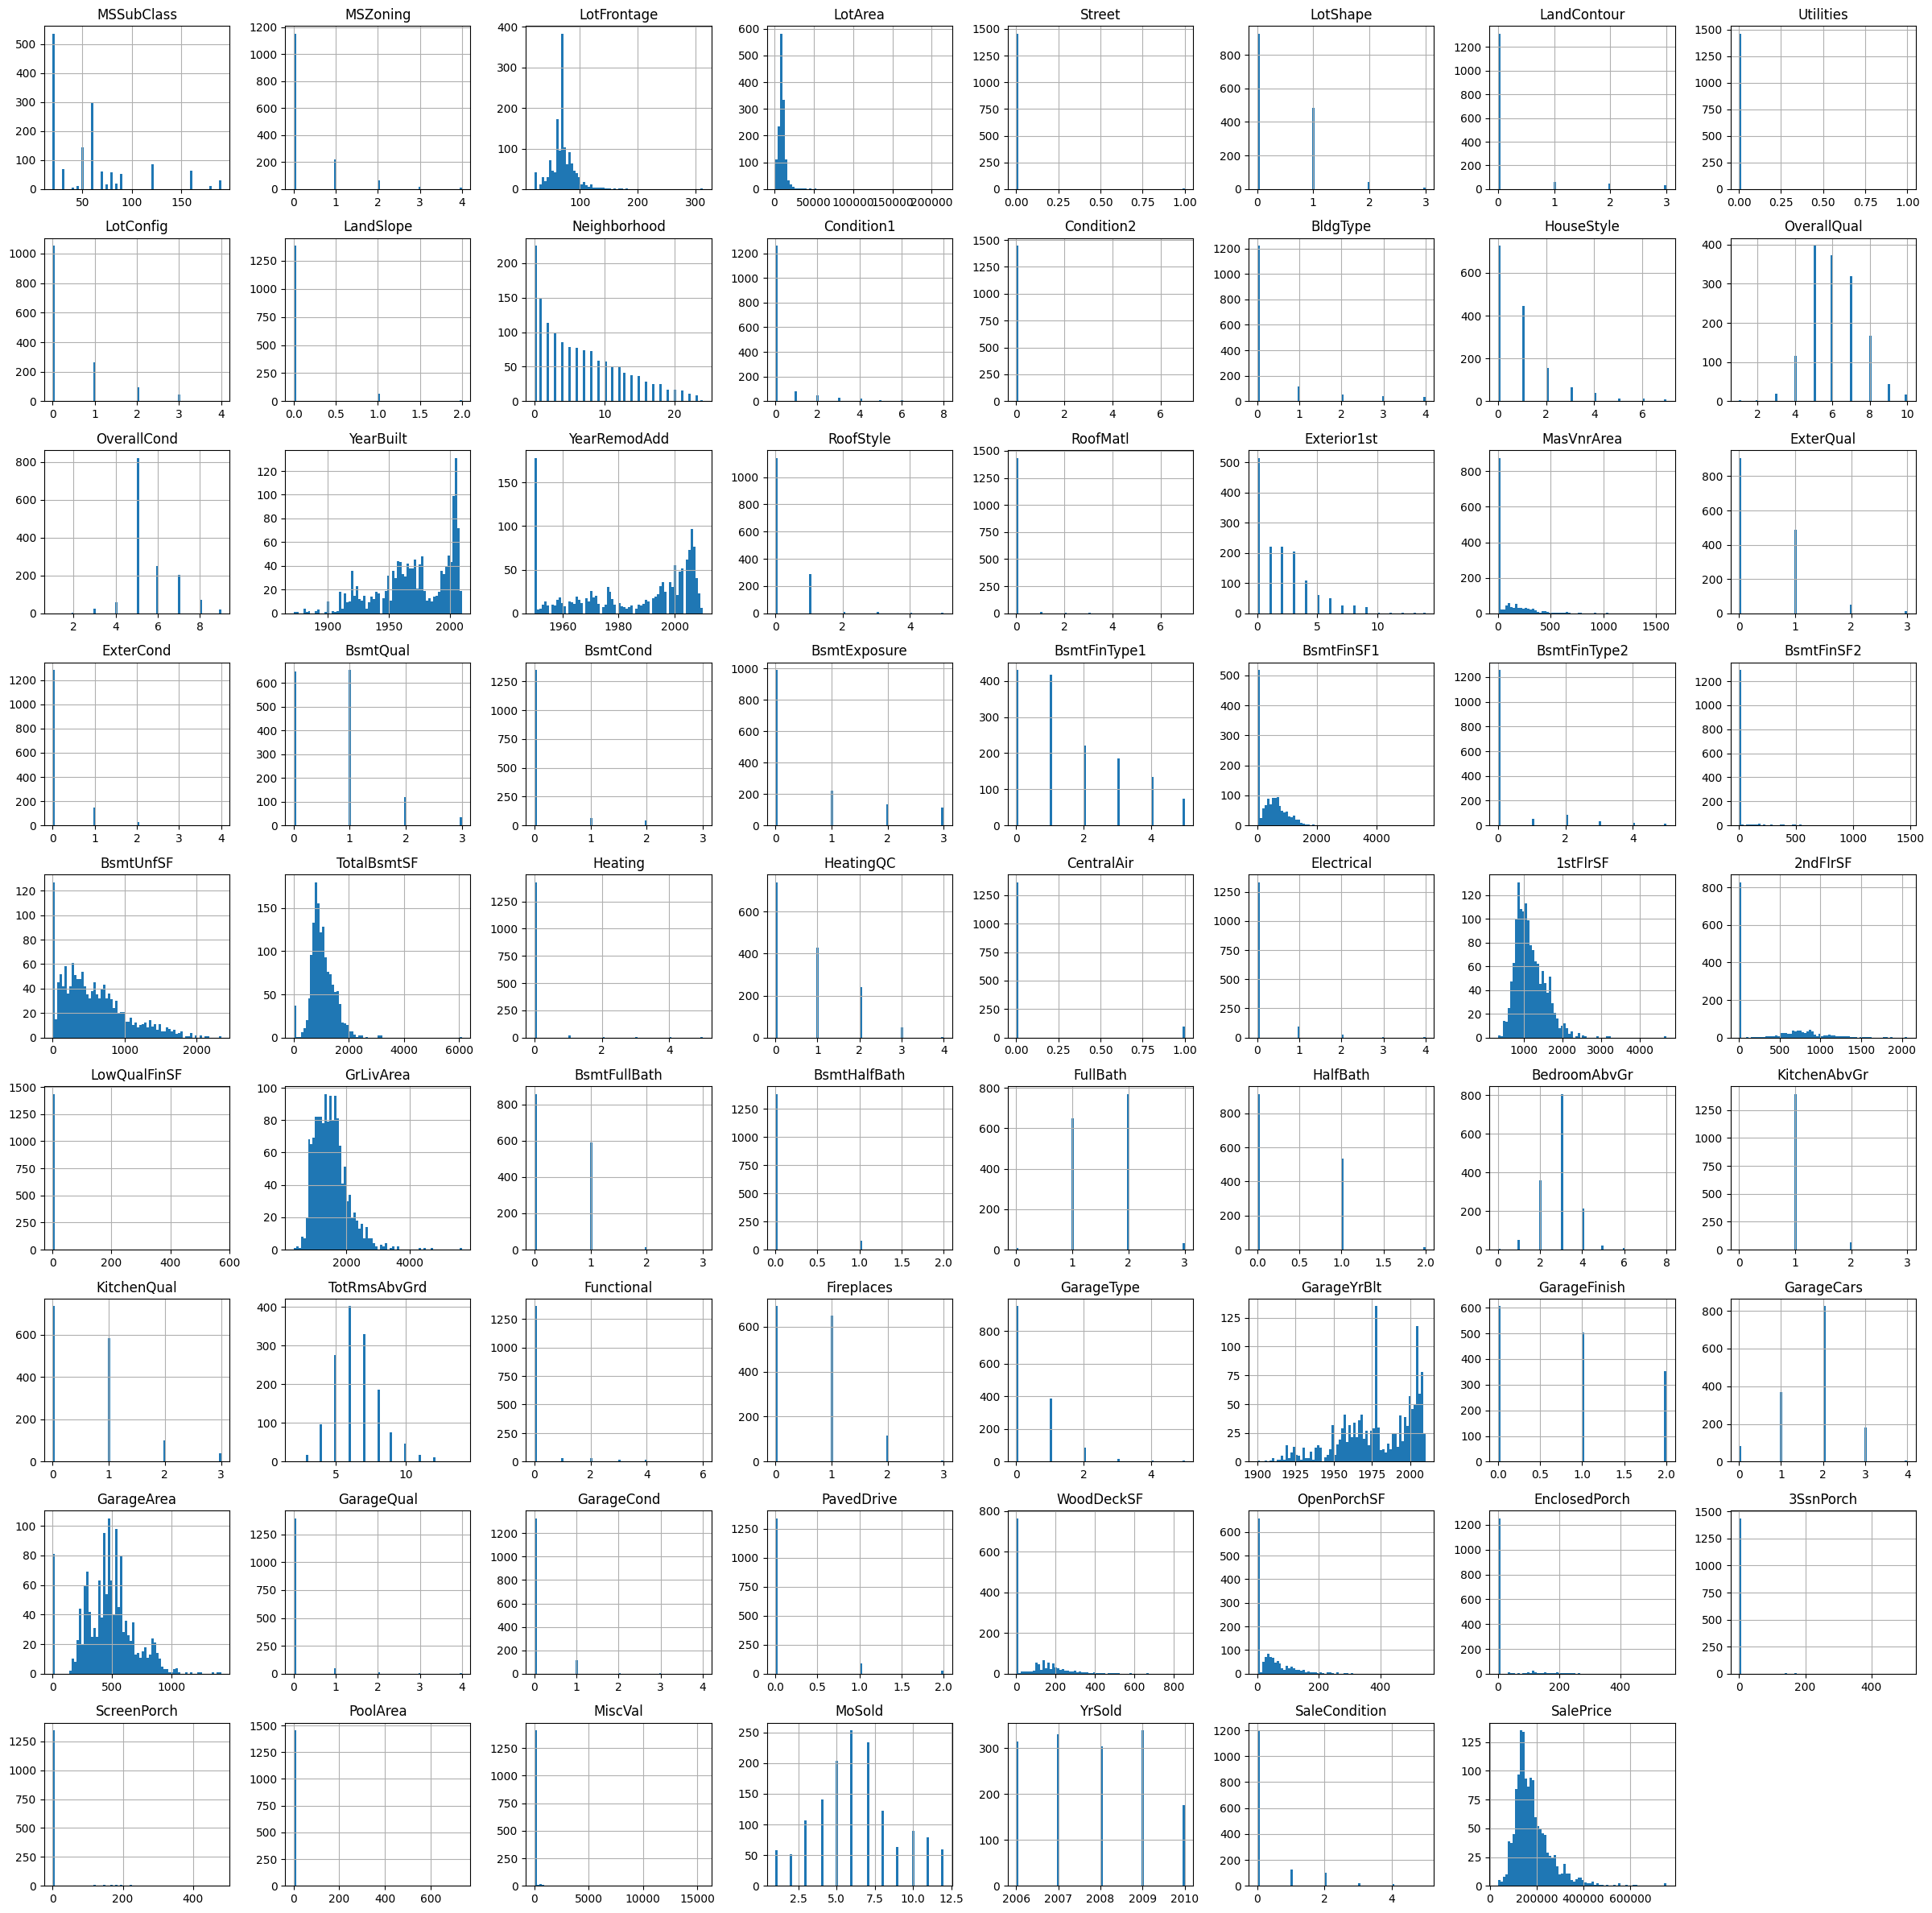

In [45]:
datos_entrenamiento.hist(bins=70, figsize=(30,30))
plt.show()

# Grafica de dispersión contra la variable objetivo (*SalePrice*)

Con la distribución de los datos, nos damos cuenta que hay algunas columnas, donde hay demasiados datos en un sólo punto del eje horizontal, por lo tanto considero que estas columnas no van a aportar la información suficiente libre de sesgos que pudieran ser importantes, para la predicción de los respectivos datos, pero también para evitar esta clase de sesgos, considero importante ver la evolución o el comportamiento de cada uno de los respectivos datos respecto a la columna de **SalePrice**, así es posible que podamos visualizar de una forma más clara las columnas que vamos a necesitar en nuestra predicción, aparte del filtro ya aplicado con el coeficiente $R$ de Pearson

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


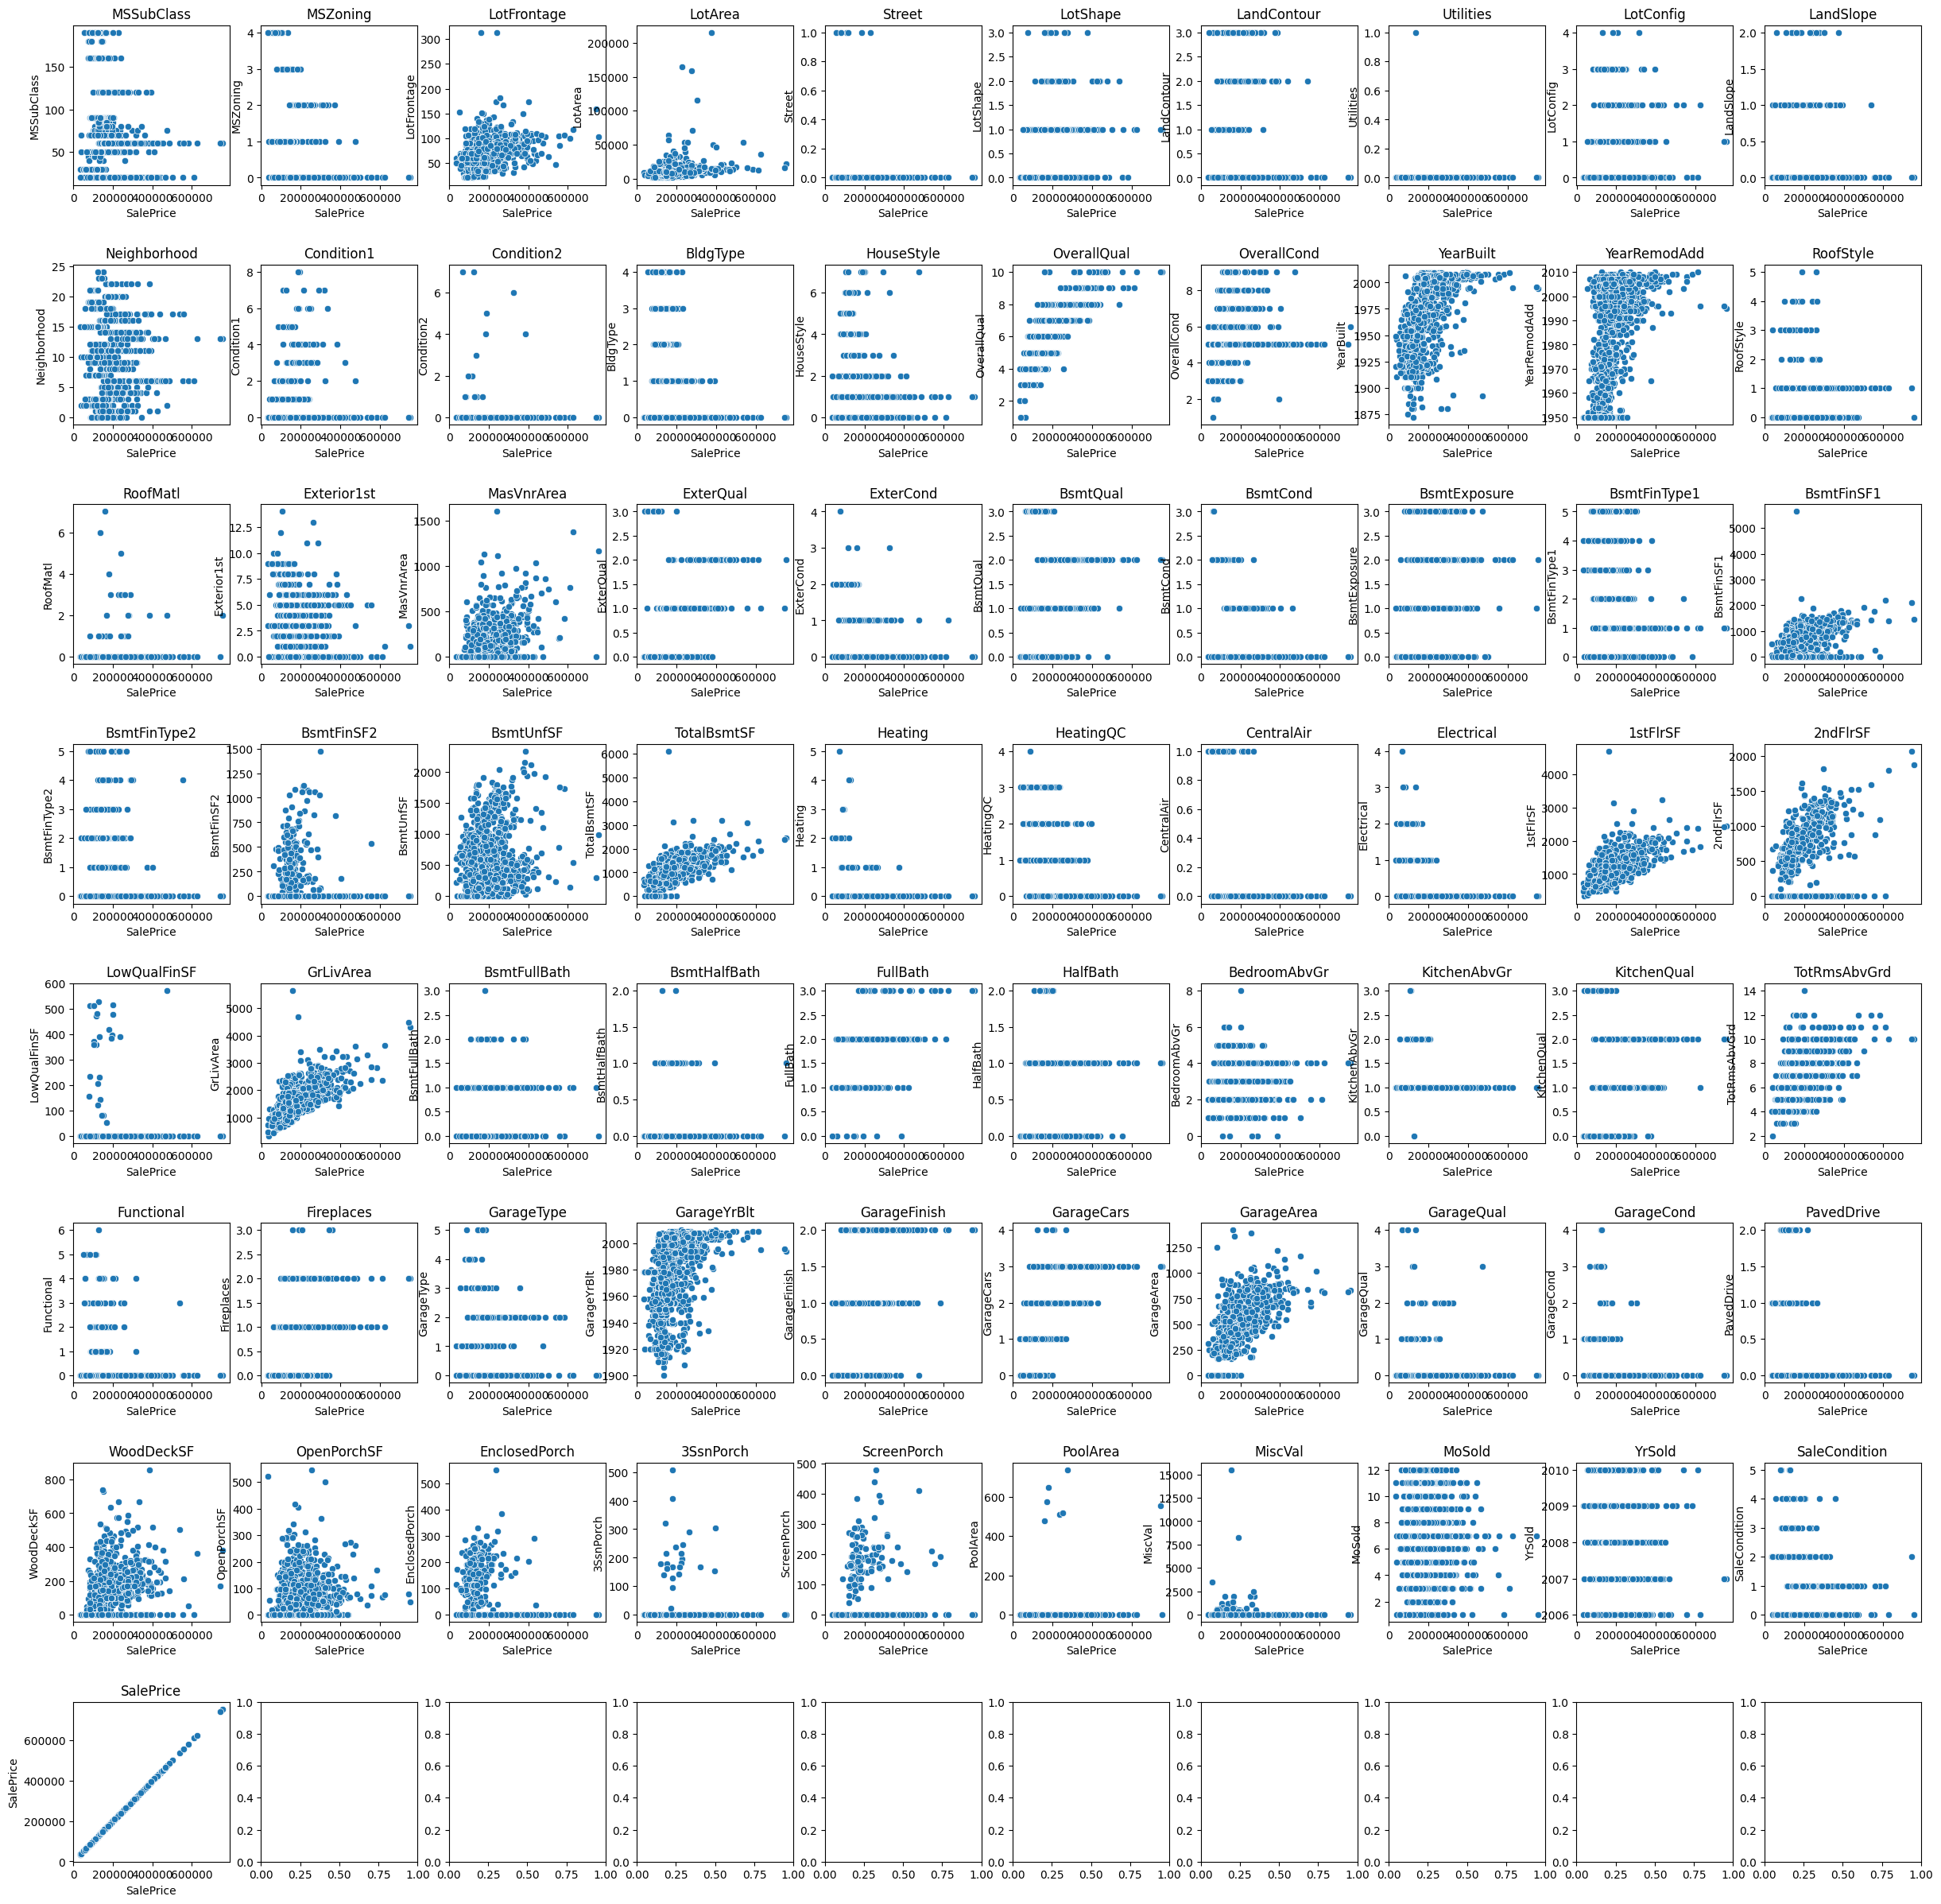

In [46]:
import seaborn as sns
fig, axes = plt.subplots(nrows=8, ncols=10, figsize=(30, 30))

# Iterar por las demás columnas
for i, columna in enumerate(datos_entrenamiento.columns):
    # Crear un gráfico de dispersión en cada subparcela
    sns.scatterplot(x=datos_entrenamiento['SalePrice'], y=datos_entrenamiento[columna], ax=axes[i // 10, i % 10])
    # Agregar título a cada subparcela
    axes[i // 10, i % 10].set_title(columna)

# Ajustar el espacio entre subparcelas
plt.subplots_adjust(hspace=0.5)

# Mostrar la figura
plt.show()

Teniendo la información acerca del coeficiente $R$ de Pearson, vamos a tener en cuenta aquellas columnas que tengan un valor por encima de $0.5$, que son aquellas moderadamente correlacionadas, y aquellas con un valor superior a $0.7$, que corresponden a aquellas fuertemente correlacionadas, y que vamos a utilizar para poder predecir el precio de las casas, esperando que con está elección, tengamos un grado acertado de predicción

Por lo tanto se van a guardar en un nuevo dataframe cada uno de los dos respectivos conjuntos, con sus respectivas visualizaciones sobre el comportamiento de la columna vs el precio

In [47]:
r_moderada = ['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'GarageFinish', 'FullBath', 'ExterQual', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']
r_moderada = datos_entrenamiento.loc[:, r_moderada]
r_moderada.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,GarageFinish,FullBath,ExterQual,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,1.0,2,1,856,856,548,2,1710,7,208500
1,1976,1976,6,1.0,2,0,1262,1262,460,2,1262,6,181500
2,2002,2001,6,1.0,2,1,920,920,608,2,1786,7,223500
3,1970,1915,7,0.0,1,0,961,756,642,3,1717,7,140000
4,2000,2000,9,1.0,2,1,1145,1145,836,3,2198,8,250000


In [48]:
r_fuerte = ['GrLivArea', 'OverallQual', 'SalePrice']
r_fuerte = datos_entrenamiento.loc[:, r_fuerte]
r_fuerte.head()

,GrLivArea,OverallQual,SalePrice
0,1710,7,208500
1,1262,6,181500
2,1786,7,223500
3,1717,7,140000
4,2198,8,250000


Vamos a probar la regresión lineal primero con los datos moderadamente correlacionados, y luego con los fuertemente correlacionados

# Modelos de Machine Learning aplicados al conjunto de datos

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
Y_entrenamiento = r_moderada["SalePrice"]
X_entrenamiento = r_moderada.drop(['SalePrice'], axis=1)

In [51]:
#Dividimos los datos para poder entrenar los datos con el conjunto de entrenamiento,
#Y realizar una predicción sobre el mismo
x_train, x_test, y_train, y_test = train_test_split(X_entrenamiento, Y_entrenamiento, test_size=0.3)

## Primer Regresor
Para este primer regresor vamos a utilizar el modelo de regresión lineal multiple, para poder obtener el mejor valor

In [52]:
primer_regresor_1 = LinearRegression()
primer_regresor_1.fit(x_train, y_train)

LinearRegression()

In [53]:
primer_regresor_1.coef_

array([ 2.08021328e+02,  1.48188357e+02, -9.31493656e+02,  6.20414771e+03,
       -3.58316186e+03,  1.05352665e+04,  1.24536173e+01,  1.75997065e+01,
        6.48765105e+00,  1.32846842e+04,  4.63895488e+01,  1.81942706e+04])

In [54]:
primer_regresor_1.intercept_

-763649.1451075189

Realizamos la predicción de acuerdo a datos dentro del conjunto de entrenamiento, para ver que tan eficiente es el modelo, para después poder extrapolar la información a los datos de prueba y obtener los respectivos resultados

In [55]:
precio_estimado = primer_regresor_1.predict(x_test)

In [56]:
print(primer_regresor_1.score(x_test, y_test))

0.8182506902670201


A continuación podemos ver la diferencia entre el precio real y el precio estimado de acuerdo a la regresión lineal

In [57]:
comparacion_r_moderada_1 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_estimado})
comparacion_r_moderada_1['Error'] = abs(y_test-precio_estimado)
comparacion_r_moderada_1

,Precio Real,precio estimado,Error
920,201000,196301.803073,4698.196927
1432,64500,83553.522540,19053.522540
165,127500,108345.688479,19154.311521
1291,119500,111342.630565,8157.369435
435,212000,210241.331765,1758.668235
...,...,...,...
849,187000,195044.394830,8044.394830
123,153900,182020.829445,28120.829445
1084,187500,175497.038556,12002.961444
699,196000,218810.438081,22810.438081


In [58]:
from sklearn.metrics import mean_squared_error

rmse_1 = mean_squared_error(y_test, precio_estimado)**0.5
print("RMSE:", rmse_1)

RMSE: 33372.042319826585


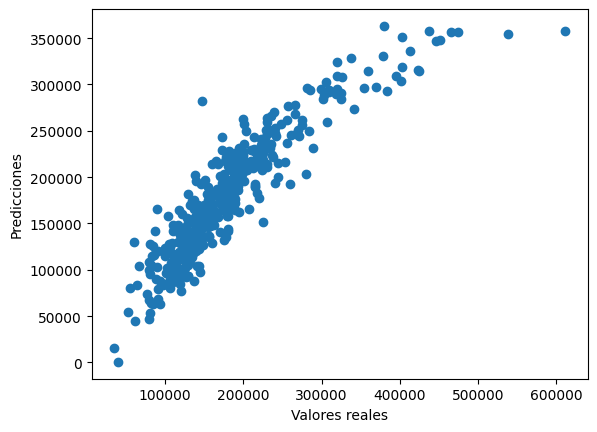

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_estimado)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Segundo Regresor

En este segundo clasificador vamos a utilizar la regresión polinomial, pero para eso sería ideal poder escoger el grado del polinomio que mejor se ajusta a nuestro modelo, debido a que un polinomio de un grado muy pequeño, puede causar Underfitting si el modelo es muy simple, u Overfitting si el polinomio se ajusta demasiado a los datos

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear las características polinomiales
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)

# Entrenar el modelo
segundo_regresor_1 = LinearRegression()
segundo_regresor_1.fit(X_train_poly, y_train)

# Hacer predicciones
precio_polinomial_estimado = segundo_regresor_1.predict(poly.fit_transform(x_test))

In [61]:
comparacion_r_moderada_2 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_polinomial_estimado})
comparacion_r_moderada_2['Error'] = abs(y_test-precio_polinomial_estimado)
comparacion_r_moderada_2

,Precio Real,precio estimado,Error
920,201000,188844.746326,12155.253674
1432,64500,109678.815437,45178.815437
165,127500,116766.259660,10733.740340
1291,119500,130783.779848,11283.779848
435,212000,196877.226476,15122.773524
...,...,...,...
849,187000,191348.548846,4348.548846
123,153900,170100.400599,16200.400599
1084,187500,167967.326589,19532.673411
699,196000,207578.883601,11578.883601


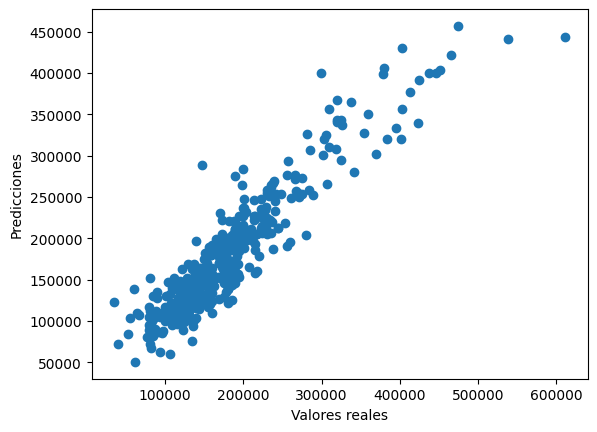

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_polinomial_estimado)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error

rmse_2 = mean_squared_error(y_test, precio_polinomial_estimado)**0.5
print("RMSE:", rmse_2)

RMSE: 28734.332039608966


In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear las características polinomiales
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)

# Entrenar el modelo
segundo_regresor_1_1 = LinearRegression()
segundo_regresor_1_1.fit(X_train_poly, y_train)

# Hacer predicciones
precio_polinomial_estimado_1 = segundo_regresor_1_1.predict(poly.fit_transform(x_test))

In [65]:
comparacion_r_moderada_3 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_polinomial_estimado_1})
comparacion_r_moderada_3['Error'] = abs(y_test-precio_polinomial_estimado_1)
comparacion_r_moderada_3

,Precio Real,precio estimado,Error
920,201000,192285.888731,8714.111269
1432,64500,121622.118188,57122.118188
165,127500,113228.944034,14271.055966
1291,119500,118650.963746,849.036254
435,212000,181567.153014,30432.846986
...,...,...,...
849,187000,164106.507787,22893.492213
123,153900,157690.770150,3790.770150
1084,187500,160661.173235,26838.826765
699,196000,203408.613941,7408.613941


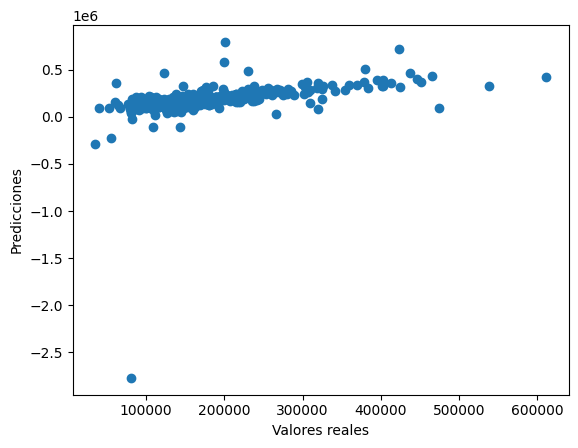

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_polinomial_estimado_1)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error

rmse_3 = mean_squared_error(y_test, precio_polinomial_estimado_1)**0.5
print("RMSE:", rmse_3)

RMSE: 154001.47386000215


In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear las características polinomiales
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(x_train)

# Entrenar el modelo
segundo_regresor_2_1 = LinearRegression()
segundo_regresor_2_1.fit(X_train_poly, y_train)

# Hacer predicciones
precio_polinomial_estimado_2 = segundo_regresor_2_1.predict(poly.fit_transform(x_test))

In [69]:
comparacion_r_moderada_4 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_polinomial_estimado_2})
comparacion_r_moderada_4['Error'] = abs(y_test-precio_polinomial_estimado_2)
comparacion_r_moderada_4

,Precio Real,precio estimado,Error
920,201000,2.971605e+05,9.616054e+04
1432,64500,-1.242863e+07,1.249313e+07
165,127500,-7.403259e+06,7.530759e+06
1291,119500,-2.110703e+05,3.305703e+05
435,212000,5.710745e+05,3.590745e+05
...,...,...,...
849,187000,-3.891908e+07,3.910608e+07
123,153900,3.880291e+05,2.341291e+05
1084,187500,2.962607e+05,1.087607e+05
699,196000,2.272957e+05,3.129571e+04


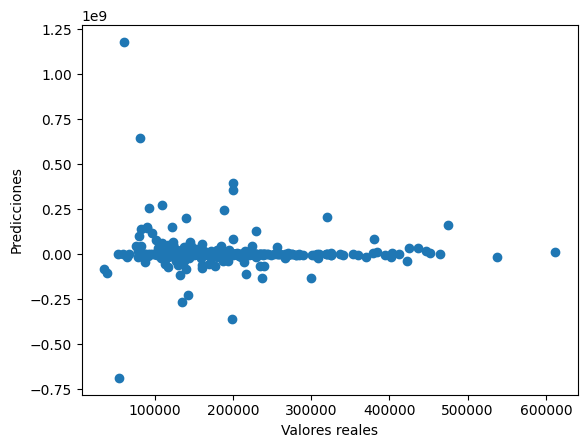

In [70]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_polinomial_estimado_2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error

rmse_4 = mean_squared_error(y_test, precio_polinomial_estimado_2)**0.5
print("RMSE:", rmse_4)

RMSE: 88910269.87343495


Notamos que con el modelo polinomial los datos no se ajustan y su error cuadrático medio aumenta a medida que aumenta el grado del polinomio, por lo tanto no es un buen modelo para predecir los datos

## Tercer Regresor


In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
tercer_regresor_1 = DecisionTreeRegressor(max_depth=5)

In [74]:
tercer_regresor_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [75]:
precio_arboles = tercer_regresor_1.predict(x_test)

In [76]:
comparacion_r_moderada_5 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_arboles})
comparacion_r_moderada_5['Error'] = abs(y_test-precio_arboles)
comparacion_r_moderada_5

,Precio Real,precio estimado,Error
920,201000,184259.376238,16740.623762
1432,64500,92657.111111,28157.111111
165,127500,117962.471429,9537.528571
1291,119500,117962.471429,1537.528571
435,212000,188744.500000,23255.500000
...,...,...,...
849,187000,184259.376238,2740.623762
123,153900,146069.043956,7830.956044
1084,187500,184259.376238,3240.623762
699,196000,188744.500000,7255.500000


In [77]:
from sklearn.metrics import mean_squared_error

rmse_5 = mean_squared_error(y_test, precio_arboles)**0.5
print("RMSE:", rmse_5)

RMSE: 36158.369741672825


[Text(0.51875, 0.9166666666666666, 'x[11] <= 7.5\nsquared_error = 6379962794.782\nsamples = 1022\nvalue = 181961.353'),
 Text(0.26666666666666666, 0.75, 'x[11] <= 6.5\nsquared_error = 2445033156.826\nsamples = 846\nvalue = 157625.125'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[9] <= 1.5\nsquared_error = 1372185961.761\nsamples = 623\nvalue = 139700.653'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[6] <= 1035.5\nsquared_error = 724178472.509\nsamples = 293\nvalue = 120201.314'),
 Text(0.03333333333333333, 0.25, 'x[11] <= 4.5\nsquared_error = 648378100.535\nsamples = 194\nvalue = 110918.711'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 607938468.691\nsamples = 54\nvalue = 92657.111'),
 Text(0.05, 0.08333333333333333, 'squared_error = 485731357.221\nsamples = 140\nvalue = 117962.471'),
 Text(0.1, 0.25, 'x[7] <= 1086.0\nsquared_error = 372983053.663\nsamples = 99\nvalue = 138391.465'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 3

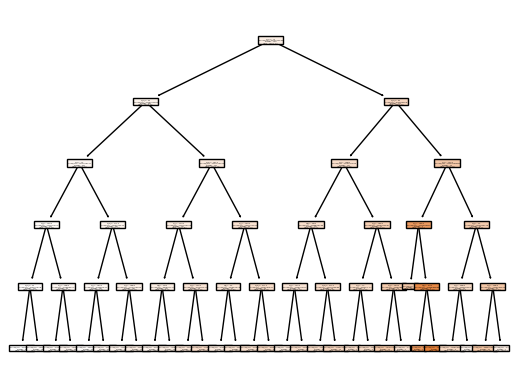

In [78]:
from sklearn.tree import plot_tree

plot_tree(tercer_regresor_1, filled=True)

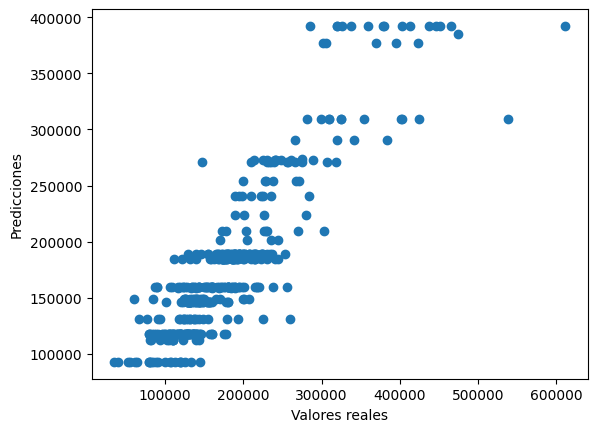

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_arboles)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Cuarto Regresor

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
cuarto_regresor_1 = KNeighborsRegressor(n_neighbors=5)

In [82]:
cuarto_regresor_1.fit(x_train, y_train)

KNeighborsRegressor()

In [83]:
precio_vecinos = cuarto_regresor_1.predict(x_test)

In [84]:
comparacion_r_moderada_6 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_vecinos})
comparacion_r_moderada_6['Error'] = abs(y_test-precio_vecinos)
comparacion_r_moderada_6

,Precio Real,precio estimado,Error
920,201000,189800.0,11200.0
1432,64500,104480.0,39980.0
165,127500,128380.0,880.0
1291,119500,99800.0,19700.0
435,212000,189470.0,22530.0
...,...,...,...
849,187000,171800.0,15200.0
123,153900,166080.0,12180.0
1084,187500,176853.0,10647.0
699,196000,178566.0,17434.0


In [85]:
from sklearn.metrics import mean_squared_error

rmse_6 = mean_squared_error(y_test, precio_vecinos)**0.5
print("RMSE:", rmse_6)

RMSE: 39188.97642680334


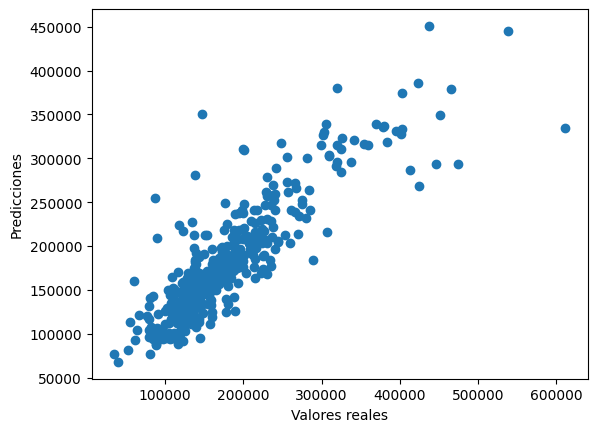

In [86]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_vecinos)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Quinto Regresor

In [87]:
from sklearn.linear_model import Ridge

In [88]:
quinto_regresor_1 = Ridge(alpha=1.0)

In [89]:
quinto_regresor_1.fit(x_train, y_train)

Ridge()

In [90]:
precio_crestas = quinto_regresor_1.predict(x_test)

In [91]:
comparacion_r_moderada_7 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_crestas})
comparacion_r_moderada_7['Error'] = abs(y_test-precio_crestas)
comparacion_r_moderada_7

,Precio Real,precio estimado,Error
920,201000,196294.602623,4705.397377
1432,64500,83596.570169,19096.570169
165,127500,108425.170368,19074.829632
1291,119500,111413.244627,8086.755373
435,212000,210248.096599,1751.903401
...,...,...,...
849,187000,195031.903672,8031.903672
123,153900,182022.505722,28122.505722
1084,187500,175494.603573,12005.396427
699,196000,218814.048275,22814.048275


In [92]:
from sklearn.metrics import mean_squared_error

rmse_7 = mean_squared_error(y_test, precio_crestas)**0.5
print("RMSE:", rmse_7)

RMSE: 33370.19818565867


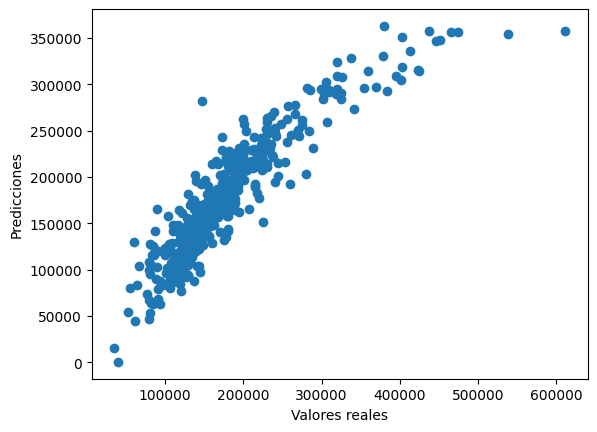

In [93]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_crestas)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Sexto Regressor

In [94]:
from sklearn.linear_model import Lasso

In [95]:
sexto_regresor_1 = Lasso(alpha=1.0)

In [96]:
sexto_regresor_1.fit(x_train, y_train)

Lasso()

In [97]:
precio_Lasso = sexto_regresor_1.predict(x_test)

In [98]:
comparacion_r_moderada_8 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_Lasso})
comparacion_r_moderada_8['Error'] = abs(y_test-precio_Lasso)
comparacion_r_moderada_8

,Precio Real,precio estimado,Error
920,201000,196301.082011,4698.917989
1432,64500,83561.117081,19061.117081
165,127500,108354.897529,19145.102471
1291,119500,111351.995310,8148.004690
435,212000,210242.142793,1757.857207
...,...,...,...
849,187000,195042.547540,8042.547540
123,153900,182022.258491,28122.258491
1084,187500,175496.421390,12003.578610
699,196000,218811.685539,22811.685539


In [99]:
from sklearn.metrics import mean_squared_error

rmse_8 = mean_squared_error(y_test, precio_Lasso)**0.5
print("RMSE:", rmse_8)

RMSE: 33372.10785582229


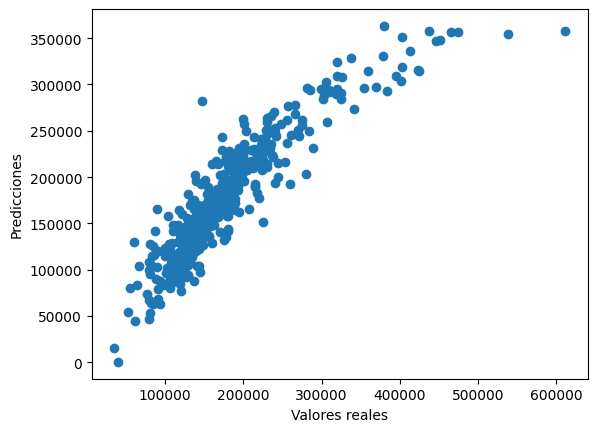

In [100]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_Lasso)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

Luego con estos modelos, el que tiene el valor más bajo de RMSE es el modelo correspondiente a la regresión lineal, los otros modelos aunque algunos bajan la diferencia del error absoluto en algunos casos, parece que en otros valores no pasa lo mismo, ahora vamos a ver que sucede con aquellos datos que tienen correlación fuerte

In [101]:
Y_entrenamiento = r_fuerte["SalePrice"]
X_entrenamiento = r_fuerte.drop(['SalePrice'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_entrenamiento, Y_entrenamiento, test_size=0.3)

## Primer Regresor

In [102]:
Y_entrenamiento = r_fuerte["SalePrice"]
X_entrenamiento = r_fuerte.drop(['SalePrice'], axis=1)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X_entrenamiento, Y_entrenamiento, test_size=0.3)

In [104]:
primer_regresor_2 = LinearRegression()
primer_regresor_2.fit(x_train, y_train)

LinearRegression()

In [105]:
primer_regresor_2.coef_

array([   64.79155357, 32374.97442225])

In [106]:
primer_regresor_2.intercept_

-113897.18203852078

In [107]:
precio_estimado = primer_regresor_2.predict(x_test)

In [108]:
print(primer_regresor_2.score(x_test, y_test))

0.659237186742742


In [109]:
comparacion_r_moderada_9 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_estimado})
comparacion_r_moderada_9['Error'] = abs(y_test-precio_estimado)
comparacion_r_moderada_9

,Precio Real,precio estimado,Error
81,153500,166978.971616,13478.971616
50,177000,175596.248240,1403.751760
704,213000,208878.304412,4121.695588
685,207500,248141.985875,40641.985875
763,337000,298334.637528,38665.362472
...,...,...,...
305,305900,274685.720476,31214.279524
667,193500,189137.682936,4362.317064
504,147000,166007.098312,19007.098312
1049,84900,75858.860469,9041.139531


In [110]:
from sklearn.metrics import mean_squared_error

rmse_9 = mean_squared_error(y_test, precio_estimado)**0.5
print("RMSE:", rmse_9)

RMSE: 45162.829776580635


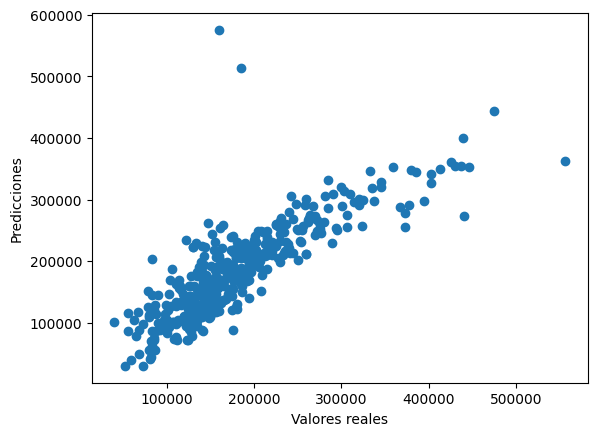

In [111]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_estimado)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Segundo Regresor

In [112]:
# Crear las características polinomiales
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)

# Entrenar el modelo
segundo_regresor_2 = LinearRegression()
segundo_regresor_2.fit(X_train_poly, y_train)

# Hacer predicciones
precio_polinomial_estimado = segundo_regresor_2.predict(poly.fit_transform(x_test))

In [113]:
comparacion_r_moderada_2 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_polinomial_estimado})
comparacion_r_moderada_2['Error'] = abs(y_test-precio_polinomial_estimado)
comparacion_r_moderada_2

,Precio Real,precio estimado,Error
81,153500,157125.034382,3625.034382
50,177000,164673.193405,12326.806595
704,213000,198663.199095,14336.800905
685,207500,243131.751584,35631.751584
763,337000,318453.448360,18546.551640
...,...,...,...
305,305900,285647.504358,20252.495642
667,193500,176151.805650,17348.194350
504,147000,156261.849661,9261.849661
1049,84900,104307.709330,19407.709330


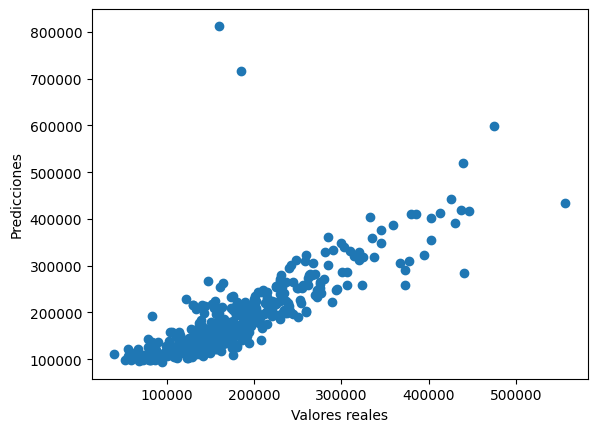

In [114]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_polinomial_estimado)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error

rmse_10 = mean_squared_error(y_test, precio_polinomial_estimado)**0.5
print("RMSE:", rmse_10)

RMSE: 52785.199733759255


In [116]:
# Crear las características polinomiales
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)

# Entrenar el modelo
segundo_regresor_1_2 = LinearRegression()
segundo_regresor_1_2.fit(X_train_poly, y_train)

# Hacer predicciones
precio_polinomial_estimado_1 = segundo_regresor_1_2.predict(poly.fit_transform(x_test))
comparacion_r_moderada_3 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_polinomial_estimado_1})
comparacion_r_moderada_3['Error'] = abs(y_test-precio_polinomial_estimado_1)
comparacion_r_moderada_3

,Precio Real,precio estimado,Error
81,153500,159247.700900,5747.700900
50,177000,166765.392825,10234.607175
704,213000,198120.801586,14879.198414
685,207500,237910.194628,30410.194628
763,337000,312230.376683,24769.623317
...,...,...,...
305,305900,283124.762675,22775.237325
667,193500,177295.821816,16204.178184
504,147000,158355.247015,11355.247015
1049,84900,104113.559794,19213.559794


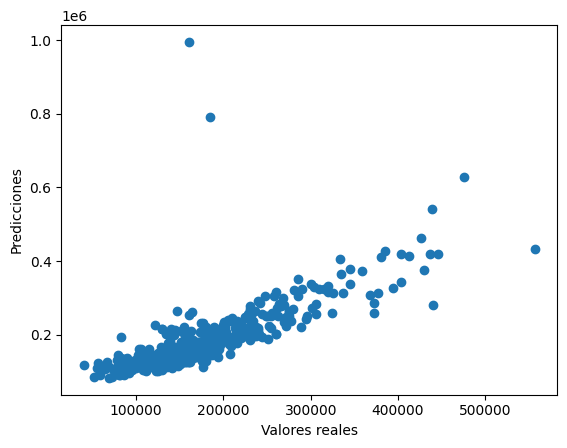

In [117]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_polinomial_estimado_1)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error

rmse_11 = mean_squared_error(y_test, precio_polinomial_estimado_1)**0.5
print("RMSE:", rmse_11)

RMSE: 59917.76838296559


In [119]:
# Crear las características polinomiales
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(x_train)

# Entrenar el modelo
segundo_regresor_2_2 = LinearRegression()
segundo_regresor_2_2.fit(X_train_poly, y_train)

# Hacer predicciones
precio_polinomial_estimado_2 = segundo_regresor_2_2.predict(poly.fit_transform(x_test))
comparacion_r_moderada_4 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_polinomial_estimado_2})
comparacion_r_moderada_4['Error'] = abs(y_test-precio_polinomial_estimado_2)
comparacion_r_moderada_4

,Precio Real,precio estimado,Error
81,153500,157567.558509,4067.558509
50,177000,164499.869834,12500.130166
704,213000,199079.772627,13920.227373
685,207500,237602.042222,30102.042222
763,337000,314009.773747,22990.226253
...,...,...,...
305,305900,286820.503934,19079.496066
667,193500,174419.510163,19080.489837
504,147000,156739.149912,9739.149912
1049,84900,106989.428907,22089.428907


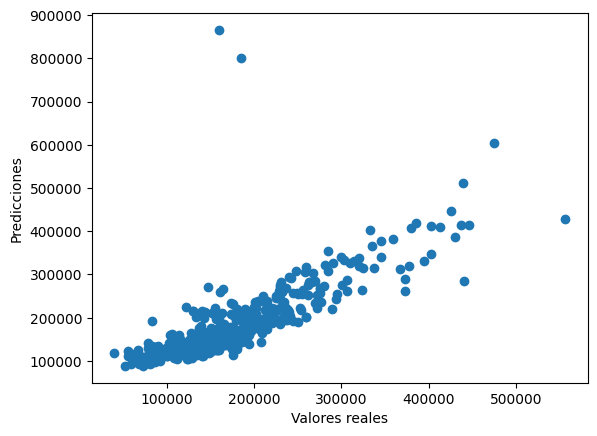

In [120]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_polinomial_estimado_2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error

rmse_12 = mean_squared_error(y_test, precio_polinomial_estimado_2)**0.5
print("RMSE:", rmse_12)

RMSE: 56107.983052294614


## Tercer regresor

In [122]:
tercer_regresor_2 = DecisionTreeRegressor(max_depth=5)
tercer_regresor_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [123]:
precio_arboles = tercer_regresor_2.predict(x_test)
comparacion_r_moderada_5 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_arboles})
comparacion_r_moderada_5['Error'] = abs(y_test-precio_arboles)
comparacion_r_moderada_5

,Precio Real,precio estimado,Error
81,153500,142680.073171,10819.926829
50,177000,167629.166667,9370.833333
704,213000,209596.852459,3403.147541
685,207500,246141.083333,38641.083333
763,337000,303814.630435,33185.369565
...,...,...,...
305,305900,303814.630435,2085.369565
667,193500,191326.236842,2173.763158
504,147000,142680.073171,4319.926829
1049,84900,106153.734375,21253.734375


In [124]:
from sklearn.metrics import mean_squared_error

rmse_13 = mean_squared_error(y_test, precio_arboles)**0.5
print("RMSE:", rmse_13)

RMSE: 52788.328749589695


[Text(0.5882352941176471, 0.9166666666666666, 'x[1] <= 7.5\nsquared_error = 6442959454.782\nsamples = 1022\nvalue = 181584.635'),
 Text(0.3137254901960784, 0.75, 'x[1] <= 6.5\nsquared_error = 2541715196.976\nsamples = 869\nvalue = 159403.463'),
 Text(0.1568627450980392, 0.5833333333333334, 'x[0] <= 1413.0\nsquared_error = 1444075794.898\nsamples = 645\nvalue = 141506.636'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[1] <= 4.5\nsquared_error = 797708782.812\nsamples = 398\nvalue = 125427.736'),
 Text(0.0392156862745098, 0.25, 'x[0] <= 808.0\nsquared_error = 664013879.084\nsamples = 80\nvalue = 98871.875'),
 Text(0.0196078431372549, 0.08333333333333333, 'squared_error = 484596357.871\nsamples = 16\nvalue = 69744.438'),
 Text(0.058823529411764705, 0.08333333333333333, 'squared_error = 443740879.601\nsamples = 64\nvalue = 106153.734'),
 Text(0.11764705882352941, 0.25, 'x[0] <= 1150.0\nsquared_error = 609298436.456\nsamples = 318\nvalue = 132108.456'),
 Text(0.09803921568627451, 0.083

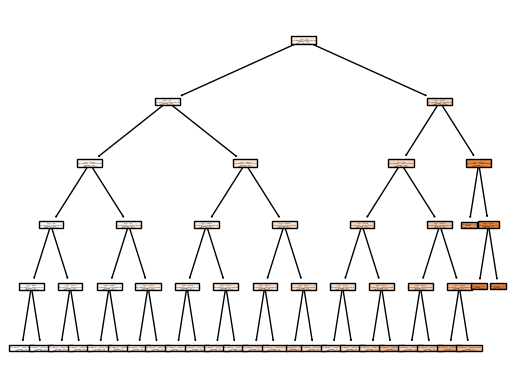

In [125]:
from sklearn.tree import plot_tree

plot_tree(tercer_regresor_2, filled=True)

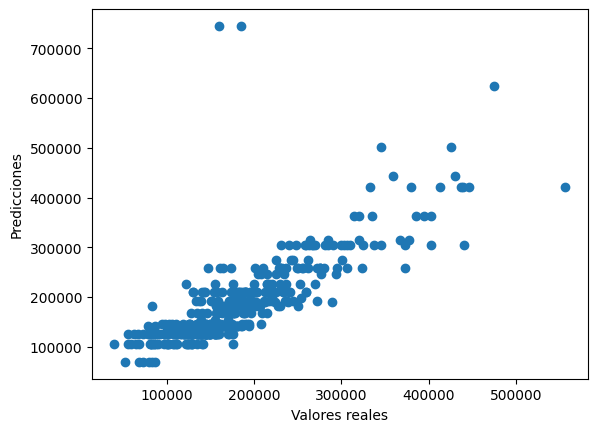

In [126]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_arboles)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Cuarto Regresor

In [127]:
cuarto_regresor_2 = KNeighborsRegressor(n_neighbors=5)
cuarto_regresor_2.fit(x_train, y_train)

KNeighborsRegressor()

In [128]:
precio_vecinos = cuarto_regresor_2.predict(x_test)
comparacion_r_moderada_6 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_vecinos})
comparacion_r_moderada_6['Error'] = abs(y_test-precio_vecinos)
comparacion_r_moderada_6

,Precio Real,precio estimado,Error
81,153500,165100.0,11600.0
50,177000,184420.0,7420.0
704,213000,184740.0,28260.0
685,207500,239660.0,32160.0
763,337000,273231.4,63768.6
...,...,...,...
305,305900,246000.0,59900.0
667,193500,189931.0,3569.0
504,147000,145250.0,1750.0
1049,84900,115800.0,30900.0


In [129]:
rmse_14 = mean_squared_error(y_test, precio_vecinos)**0.5
print("RMSE:", rmse_14)

RMSE: 59967.90212568781


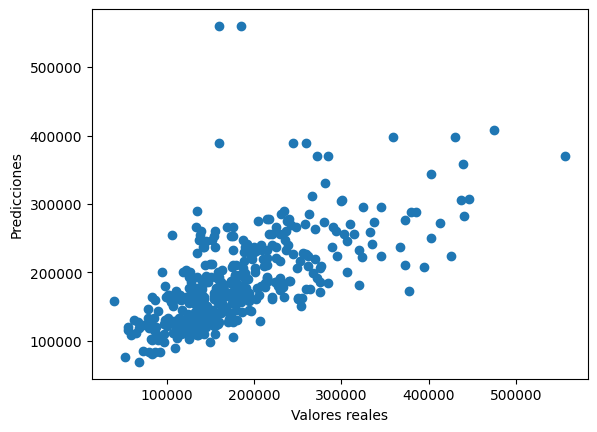

In [130]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_vecinos)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Quinto Regresor

In [131]:
quinto_regresor_2 = Ridge(alpha=1.0)
quinto_regresor_2.fit(x_train, y_train)

Ridge()

In [132]:
precio_crestas = quinto_regresor_2.predict(x_test)
comparacion_r_moderada_7 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_crestas})
comparacion_r_moderada_7['Error'] = abs(y_test-precio_crestas)
comparacion_r_moderada_7

,Precio Real,precio estimado,Error
81,153500,166974.359769,13474.359769
50,177000,175596.672063,1403.327937
704,213000,208854.116114,4145.883886
685,207500,248140.742054,40640.742054
763,337000,298318.663613,38681.336387
...,...,...,...
305,305900,274655.926867,31244.073133
667,193500,189146.019954,4353.980046
504,147000,166001.918533,19001.918533
1049,84900,75889.123102,9010.876898


In [133]:
from sklearn.metrics import mean_squared_error

rmse_15 = mean_squared_error(y_test, precio_crestas)**0.5
print("RMSE:", rmse_15)

RMSE: 45163.67681618236


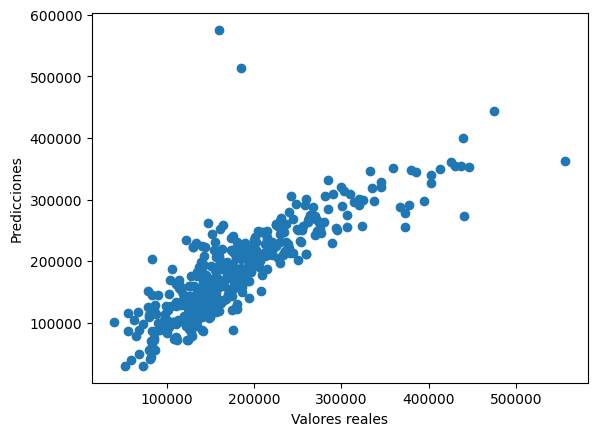

In [134]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_crestas)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

## Sexto Regresor

In [135]:
sexto_regresor_2 = Lasso(alpha=1.0)
sexto_regresor_2.fit(x_train, y_train)

Lasso()

In [136]:
precio_Lasso = sexto_regresor_2.predict(x_test)
comparacion_r_moderada_8 = pd.DataFrame({'Precio Real': y_test,'precio estimado': precio_Lasso})
comparacion_r_moderada_8['Error'] = abs(y_test-precio_Lasso)
comparacion_r_moderada_8

,Precio Real,precio estimado,Error
81,153500,166978.825819,13478.825819
50,177000,175596.261612,1403.738388
704,213000,208877.540113,4122.459887
685,207500,248141.946810,40641.946810
763,337000,298334.133146,38665.866854
...,...,...,...
305,305900,274684.779277,31215.220723
667,193500,189137.946430,4362.053570
504,147000,166006.934564,19006.934564
1049,84900,75859.816443,9040.183557


In [137]:
from sklearn.metrics import mean_squared_error

rmse_16 = mean_squared_error(y_test, precio_Lasso)**0.5
print("RMSE:", rmse_16)

RMSE: 45162.85635370072


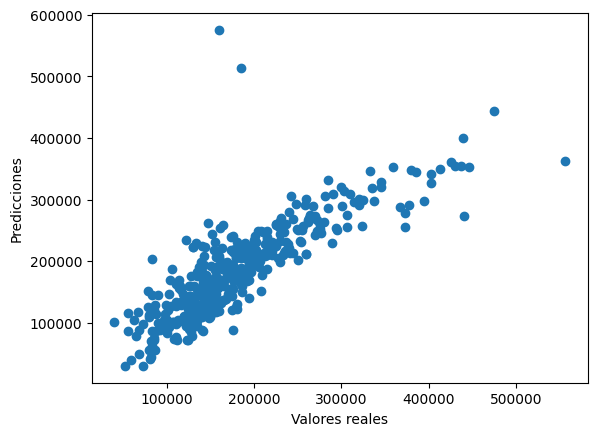

In [138]:
import matplotlib.pyplot as plt

plt.scatter(y_test, precio_Lasso)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

# Comparación de los valores del RMSE de cada uno de los modelos de Machine Learning

Ahora vamos a comparar los diferentes valores del RMSE, y aquel valor que sea el menor, será el que vamos a utilizar para poder realizar la predicción sobre los datos de prueba

In [139]:
comparacion_rmse = pd.DataFrame({'Valores Rmse con r moderada':[rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8], 'Valores Rmse con r fuerte':[rmse_9, rmse_10, rmse_11, rmse_12, rmse_13, rmse_14, rmse_15, rmse_16]})
comparacion_rmse

,Valores Rmse con r moderada,Valores Rmse con r fuerte
0,3.337204e+04,45162.829777
1,2.873433e+04,52785.199734
2,1.540015e+05,59917.768383
3,8.891027e+07,56107.983052
4,3.615837e+04,52788.328750
5,3.918898e+04,59967.902126
6,3.337020e+04,45163.676816
7,3.337211e+04,45162.856354


Organizamos los datos de menor a mayor, respecto al valor de RMSE, para aquellas columnas que tengan un coeficiente $R$ de pearson en el rango moderado

In [140]:
orden_comparacion_moderada = comparacion_rmse.sort_values(by="Valores Rmse con r moderada", ascending=True)
orden_comparacion_moderada

,Valores Rmse con r moderada,Valores Rmse con r fuerte
1,2.873433e+04,52785.199734
6,3.337020e+04,45163.676816
0,3.337204e+04,45162.829777
7,3.337211e+04,45162.856354
4,3.615837e+04,52788.328750
5,3.918898e+04,59967.902126
2,1.540015e+05,59917.768383
3,8.891027e+07,56107.983052


Está vez realizamos la comparación, pero respecto a los valores de aquellas colummnas que tengan un coeficiente $R$ de Pearson en el rango fuerte

In [141]:
orden_comparacion_fuerte = comparacion_rmse.sort_values(by="Valores Rmse con r fuerte", ascending=True)
orden_comparacion_fuerte

,Valores Rmse con r moderada,Valores Rmse con r fuerte
0,3.337204e+04,45162.829777
7,3.337211e+04,45162.856354
6,3.337020e+04,45163.676816
1,2.873433e+04,52785.199734
4,3.615837e+04,52788.328750
3,8.891027e+07,56107.983052
2,1.540015e+05,59917.768383
5,3.918898e+04,59967.902126


Guardamos las columnas en dos nuevos DataFrame, el primero respecto a aquellas columnas que tengan un coeficiente $R$ de Pearson en el rango moderado, y el segundo aquellos donde el coeficiente está en el rango fuerte

In [142]:
r_moderada_prueba = ['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'GarageFinish', 'FullBath', 'ExterQual', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']
r_moderada_prueba = datos_prueba.loc[:, r_moderada_prueba]
r_moderada_prueba.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,GarageFinish,FullBath,ExterQual,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,1961,1961,5,Unf,1,TA,896,882.0,730.0,1.0,896,5
1,1958,1958,6,Unf,1,TA,1329,1329.0,312.0,1.0,1329,6
2,1998,1997,6,Fin,2,TA,928,928.0,482.0,2.0,1629,5
3,1998,1998,7,Fin,2,TA,926,926.0,470.0,2.0,1604,6
4,1992,1992,5,RFn,2,Gd,1280,1280.0,506.0,2.0,1280,8


In [143]:
r_moderada_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   TotRmsAbvGrd  1459 non-null   int64  
 3   GarageFinish  1381 non-null   object 
 4   FullBath      1459 non-null   int64  
 5   ExterQual     1459 non-null   object 
 6   1stFlrSF      1459 non-null   int64  
 7   TotalBsmtSF   1458 non-null   float64
 8   GarageArea    1458 non-null   float64
 9   GarageCars    1458 non-null   float64
 10  GrLivArea     1459 non-null   int64  
 11  OverallQual   1459 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 136.9+ KB


Contamos la cantidad de datos nulos que hay

In [144]:
# Contar los valores faltantes por columna
missing_values_count = r_moderada_prueba.isnull().sum(axis=0)

# Mostrar las columnas con valores faltantes
for columna, cantidad in missing_values_count.items():
    if cantidad > 0:
        tipo_dato = r_moderada_prueba[columna].dtype
        print(f"Columna: {columna}")
        print(f"  - Tipo de dato: {tipo_dato}")
        print(f"  - Cantidad de valores faltantes: {cantidad}")

Columna: GarageFinish
  - Tipo de dato: object
  - Cantidad de valores faltantes: 78
Columna: TotalBsmtSF
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 1
Columna: GarageArea
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 1
Columna: GarageCars
  - Tipo de dato: float64
  - Cantidad de valores faltantes: 1


Cambiamos por los datos categoricos a aquellas dos columnas que tengo en tipo *object*

In [145]:
r_moderada_prueba['ExterQual'].replace(['TA','Gd','Ex','Fa'],[0,1,2,3], inplace=True)
r_moderada_prueba['GarageFinish'].replace(['Unf','RFn','Fin'],[0,1,2], inplace=True)

In [146]:
r_moderada_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   TotRmsAbvGrd  1459 non-null   int64  
 3   GarageFinish  1381 non-null   float64
 4   FullBath      1459 non-null   int64  
 5   ExterQual     1459 non-null   int64  
 6   1stFlrSF      1459 non-null   int64  
 7   TotalBsmtSF   1458 non-null   float64
 8   GarageArea    1458 non-null   float64
 9   GarageCars    1458 non-null   float64
 10  GrLivArea     1459 non-null   int64  
 11  OverallQual   1459 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 136.9 KB


Completamos los datos nulos

In [147]:
GarageFinish = np.random.randint(0, 2)
r_moderada_prueba['GarageFinish'].fillna(GarageFinish, inplace = True)
print(r_moderada_prueba['GarageFinish'].isnull().sum())

TotalBsmtSF = r_moderada_prueba['TotalBsmtSF'].mean()
r_moderada_prueba['TotalBsmtSF'].fillna(TotalBsmtSF, inplace = True)
print(r_moderada_prueba['TotalBsmtSF'].isnull().sum())

GarageArea = r_moderada_prueba['GarageArea'].mean()
r_moderada_prueba['GarageArea'].fillna(GarageArea, inplace = True)
print(r_moderada_prueba['GarageArea'].isnull().sum())

GarageCars = r_moderada_prueba['GarageCars'].mean()
r_moderada_prueba['GarageCars'].fillna(GarageCars, inplace = True)
print(r_moderada_prueba['GarageCars'].isnull().sum())

0
0
0
0


# Aplicación del mejor modelo para aquellos datos de prueba que tengan el menor RMSE 

Aplicamos el modelo que tuvo el RMSE mas bajo, y obtenemos nuestra columna que necesitamos:

In [148]:
precio_r_moderada = tercer_regresor_1.predict(r_moderada_prueba)
precio_r_moderada

array([117962.47142857, 148860.71428571, 184259.37623762, ...,
       146069.04395604, 117962.47142857, 201450.        ])

In [149]:
df_prediccion = datos_prueba.assign(SalePrice=precio_r_moderada)
df_prediccion

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,117962.471429
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,148860.714286
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,184259.376238
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,184259.376238
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,209861.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,92657.111111
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,92657.111111
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,146069.043956
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,117962.471429


# Predicción de los datos con $R$ moderada

In [150]:
df_prediccion_1= df_prediccion[["Id", "SalePrice"]]
df_prediccion_1

,Id,SalePrice
0,1461,117962.471429
1,1462,148860.714286
2,1463,184259.376238
3,1464,184259.376238
4,1465,209861.166667
...,...,...
1454,2915,92657.111111
1455,2916,92657.111111
1456,2917,146069.043956
1457,2918,117962.471429


In [151]:
df_prediccion_1.to_csv('Prediction_house_prices_1.csv', index=False)

In [152]:
r_fuerte_prueba = ['GrLivArea', 'OverallQual']
r_fuerte_prueba = datos_prueba.loc[:, r_fuerte_prueba]
r_fuerte_prueba.head()

,GrLivArea,OverallQual
0,896,5
1,1329,6
2,1629,5
3,1604,6
4,1280,8


In [153]:
r_fuerte_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1459 non-null   int64
 1   OverallQual  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [154]:
precio_r_fuerte = primer_regresor_2.predict(r_fuerte_prueba)

In [155]:
df_prediccion_2 = datos_prueba.assign(SalePrice=precio_r_fuerte)
df_prediccion_2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,106030.922070
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,166460.639187
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,153523.130835
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,184278.316418
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,228035.801907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,86355.092147
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,86355.092147
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,127282.551640
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,110825.497034


# Predicción del precio con $R$ fuerte

In [156]:
df_prediccion_3= df_prediccion_2[["Id", "SalePrice"]]
df_prediccion_3

,Id,SalePrice
0,1461,106030.922070
1,1462,166460.639187
2,1463,153523.130835
3,1464,184278.316418
4,1465,228035.801907
...,...,...
1454,2915,86355.092147
1455,2916,86355.092147
1456,2917,127282.551640
1457,2918,110825.497034


In [157]:
df_prediccion_3.to_csv('Prediction_house_prices_2.csv', index=False)